In [1]:
import re
import bs4 #this may be appendices only
import requests #this may be appendices only
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import datetime
import seaborn as sns
from   sklearn.linear_model import LinearRegression, LogisticRegression
from   sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
full_df_04_14 = pd.read_csv('2021-04-14_Cleaned_full_df.csv')
full_df_04_14.columns

Index(['Unnamed: 0', 'index', 'lr_my', 'author', 'title', 'pub_date',
       'publisher', 'isbn', 'lr_top', 'lr_hof', 'debut', 'lr_yfav', 'genre',
       'annotation', 'nom_lib_lr', 'permalink', 'genre_0', 'genre_1',
       'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7'],
      dtype='object')

In [4]:
indicator_vars = ['lr_top','lr_hof','debut']
for indicator in indicator_vars:
    print(indicator, full_df_04_14[indicator].value_counts())
    full_df_04_14[indicator]=full_df_04_14[indicator].apply(lambda x: 1 if x == 'x' else 0) #convert to Booleans
    print(indicator,full_df_04_14[indicator].value_counts())


lr_top x    86
Name: lr_top, dtype: int64
lr_top 0    850
1     86
Name: lr_top, dtype: int64
lr_hof x    77
Name: lr_hof, dtype: int64
lr_hof 0    859
1     77
Name: lr_hof, dtype: int64
debut x    181
Name: debut, dtype: int64
debut 0    755
1    181
Name: debut, dtype: int64


In [4]:
full_df_04_14[indicator_vars]

lr_top  lr_hof  debut
0         0       0      0
1         0       1      0
2         0       0      0
3         0       0      1
4         0       0      0
..      ...     ...    ...
931       0       0      0
932       0       0      0
933       0       0      0
934       1       0      0
935       0       0      0

[936 rows x 3 columns]

In [5]:
full_df_04_14.genre.value_counts()

Literary Fiction      210
Mystery               117
Suspense/Thriller      85
Historical Fiction     84
SF/Fantasy             82
Romance                49
Non-Fiction            32
Memoir                 11
Horror                  8
Biography               5
Short Stories           5
Short stories           1
Graphic Novel           1
Literary Fic            1
Literary Fiction        1
Suspense/Thiller        1
Name: genre, dtype: int64

In [6]:
full_df_04_14.genre.groupby(full_df_04_14.lr_my.str[:4]).value_counts()

lr_my  genre             
2013   Historical Fiction     8
       Literary Fiction       8
       Mystery                7
       Non-Fiction            5
       Romance                4
                             ..
2019   Historical Fiction    12
       Mystery               10
       Non-Fiction            2
       Graphic Novel          1
       Literary Fiction       1
Name: genre, Length: 71, dtype: int64

In [6]:
full_df_04_14.isbn.groupby(full_df_04_14.lr_my.str[:4]).count()

lr_my
2013     40
2014    110
2015    110
2016    120
2017    100
2018    115
2019    147
2020    155
2021     39
Name: isbn, dtype: int64

In [8]:
full_df_04_14.genre.groupby(full_df_04_14.lr_my.str[:4]).count()

lr_my
2013     40
2014    110
2015    110
2016    120
2017    100
2018    114
2019     99
2020      0
2021      0
Name: genre, dtype: int64

In [7]:
full_df_04_14.loc[full_df_04_14.genre=='Literary Fic']
full_df_04_14.loc[884,'genre'] = 'Literary Fiction'

In [8]:
full_df_04_14.genre = full_df_04_14.genre.str.strip()

In [9]:
full_df_04_14.genre.value_counts()

Literary Fiction      212
Mystery               117
Suspense/Thriller      85
Historical Fiction     84
SF/Fantasy             82
Romance                49
Non-Fiction            32
Memoir                 11
Horror                  8
Biography               5
Short Stories           5
Short stories           1
Graphic Novel           1
Suspense/Thiller        1
Name: genre, dtype: int64

In [41]:
full_df_04_14['genre']=full_df_04_14['genre'].astype(str)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

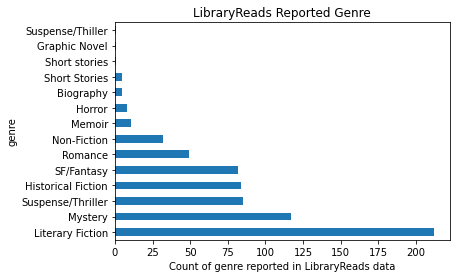

In [10]:
full_df_04_14.genre.loc[full_df_04_14.genre != 'nan'].value_counts().plot(kind = 'barh')
plt.xlabel('Count of genre reported in LibraryReads data')
plt.ylabel('genre')
plt.title('LibraryReads Reported Genre')
plt.tight_layout

Index(['Literary Fiction', 'Mystery', 'Suspense/Thriller',
       'Historical Fiction', 'SF/Fantasy', 'Romance', 'Non-Fiction', 'Memoir',
       'Horror', 'Biography', 'Short Stories', 'Graphic Novel',
       'Suspense/Thiller', 'Short stories'],
      dtype='object')


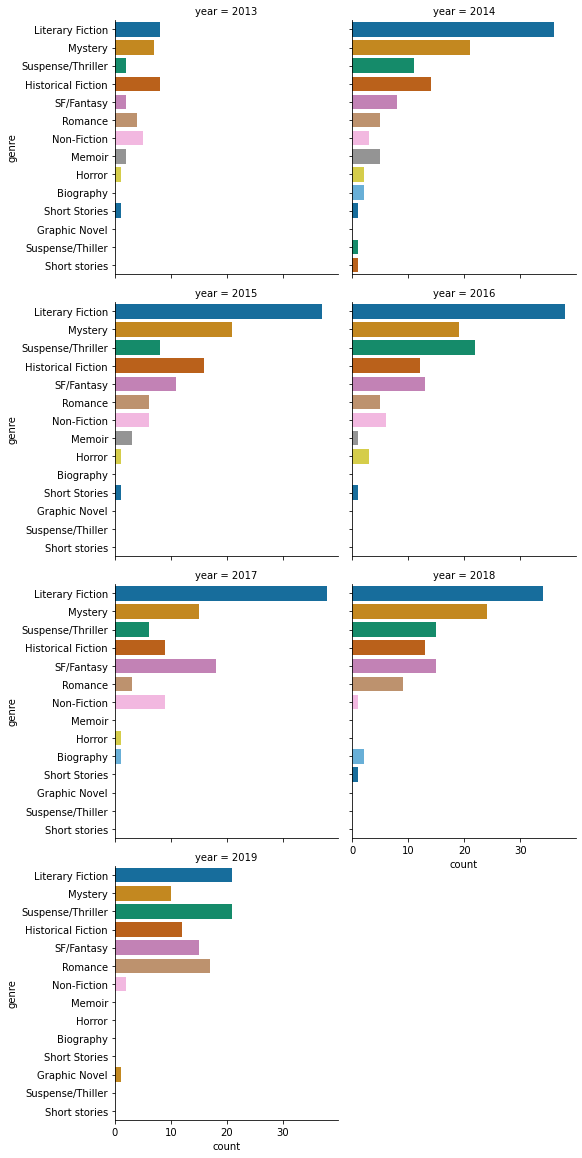

In [94]:
full_df_04_14['year'] = full_df_04_14.lr_my.str[:4].astype(int)


#sns.facetgrid(full_df_04_14.genre.loc[full_df_04_14.genre != 'nan'].groupby(
 #   full_df_04_14.lr_my.str[:4]).value_counts().plot(kind = 'barh')
ordered_genres = full_df_04_14.genre.loc[full_df_04_14.genre != 'nan'].value_counts().index
print(ordered_genres)
sns.catplot(y = 'genre', 
            data=full_df_04_14.loc[full_df_04_14.genre != 'nan'],
            kind='count',
            col = 'year', col_wrap = 2,
           height = 4, aspect = 1,
           order=ordered_genres,
           palette = 'colorblind')

In [11]:
full_df_04_14.to_csv('wide_df.csv')
long_df = pd.melt(full_df_04_14, id_vars=['isbn'], value_vars=['genre_0', 'genre_1',
       'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7'])
len(long_df)
LibofCongress_genres = long_df.value.value_counts()
print(len(LibofCongress_genres.loc[LibofCongress_genres > 1]),'genres identified in Library of Congress Records more than once')
print(len(LibofCongress_genres.loc[LibofCongress_genres == 1]),'genres identified in Library of Congress Records once')
#analogous LoC
# Key point: a book can have up to 7 LoC genres, sort order is probably default alpha order, don't assign meaning

LibofCongress_genres.index


51 genres identified in Library of Congress Records more than once
52 genres identified in Library of Congress Records once


Index(['Suspense fiction.', 'Mystery fiction.', 'Love stories.',
       'Domestic fiction.', 'Historical fiction.', 'Psychological fiction.',
       'Fiction.', 'Fantasy fiction.', 'Humorous fiction.',
       'Thrillers (Fiction)',
       ...
       'Graphic novels.', 'Utopian fiction.', 'Bible fiction.',
       'Suspence fiction.', 'Mystery in literature.', 'True crime stories.',
       'Musical fiction.', 'Love stories', 'History', 'Bildungsromans'],
      dtype='object', length=103)

In [13]:
#last hail-mary pass at the LoC for isbns with permalinks that didn't exist in March
full_df_04_14.isbn.loc[full_df_04_14.permalink.isna()].to_csv('NoPermalink.csv')

In [14]:
full_df_04_14.loc[full_df_04_14.isbn==9781728215693]

Unnamed: 0  index    lr_my              author                     title  \
47          47     51  2020/12  Macallister, Greer  The Arctic Fury: A Novel   

               pub_date             publisher           isbn  lr_top  lr_hof  \
47  2020-12-01 00:00:00  sourcebooks landmark  9781728215693       0       0   

    ...                                         nom_lib_lr permalink genre_0  \
47  ...  Joy Matteson, Downers Grove Public Library, Do...       NaN     NaN   

   genre_1 genre_2 genre_3 genre_4 genre_5 genre_6 genre_7  
47     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 24 columns]

In [16]:
full_df_04_14.loc[47,'permalink'] = 'https://lccn.loc.gov/2020015957'
full_df_04_14.loc[47,'genre_0'] = 'Biographical fiction.'

In [15]:
full_df_04_14.loc[full_df_04_14.isbn==9780062872852]

Unnamed: 0  index    lr_my         author                          title  \
183         183    198  2020/01  Bailey, Tessa  Love Her or Lose Her: A Novel   

                pub_date publisher           isbn  lr_top  lr_hof  ...  \
183  2020-01-14 00:00:00      avon  9780062872852       0       0  ...   

                                            nom_lib_lr permalink genre_0  \
183  Carole Tossman, Howard County Library System, ...       NaN     NaN   

    genre_1 genre_2 genre_3 genre_4 genre_5 genre_6 genre_7  
183     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 24 columns]

In [17]:
full_df_04_14.loc[183,'permalink'] = 'https://lccn.loc.gov/2020275791'
full_df_04_14.loc[183,'genre_0'] = 'Chick lit.'
full_df_04_14.loc[183,'genre_1'] = 'Fiction.'
full_df_04_14.loc[183,'genre_2'] = 'Humorous fiction'
full_df_04_14.loc[183,'genre_3'] = 'Romance fiction'
full_df_04_14.loc[183,'genre_4'] = 'Love stories'


In [18]:
full_df_04_14.loc[full_df_04_14.isbn==9780062289254].index[0]

516

In [19]:
full_df_04_14.loc[516,'permalink'] = 'https://lccn.loc.gov/2017299737'
full_df_04_14.loc[516,'genre_0'] = 'Paranormal romance stories.'
full_df_04_14.loc[516,'genre_1'] = 'Fantasy fiction.'
full_df_04_14.loc[516,'genre_2'] = 'Fiction.'
full_df_04_14.loc[516,'genre_3'] = 'Romance fiction.'
full_df_04_14.loc[516,'genre_4'] = 'Love stories.'



In [20]:
full_df_04_14.loc[full_df_04_14.isbn==9780062890047]

Unnamed: 0  index    lr_my      author         title  \
231         231    250  2019/09  Cabot, Meg  No Judgments   

                pub_date                  publisher           isbn  lr_top  \
231  2019-09-24 00:00:00  william morrow paperbacks  9780062890047       0   

     lr_hof  ...                                         nom_lib_lr permalink  \
231       0  ...  Amber Greenwood, Edgewood Public Library, Edge...       NaN   

    genre_0 genre_1 genre_2 genre_3 genre_4 genre_5 genre_6 genre_7  
231     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 24 columns]

In [21]:
full_df_04_14.loc[231,'permalink'] = 'https://lccn.loc.gov/2019010863'
full_df_04_14.loc[231,'genre_0'] = 'Love stories.'

In [22]:
full_df_04_14.loc[full_df_04_14.isbn==9781605988443]

Unnamed: 0  index    lr_my          author      title  \
708         708    772  2015/08  Dirda, Michael  Browsings   

                pub_date      publisher           isbn  lr_top  lr_hof  ...  \
708  2015-08-15 00:00:00  pegasus books  9781605988443       0       0  ...   

                                            nom_lib_lr permalink genre_0  \
708  Robin Nesbitt, Columbus Metropolitan Library, ...       NaN     NaN   

    genre_1 genre_2 genre_3 genre_4 genre_5 genre_6 genre_7  
708     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 24 columns]

In [23]:
full_df_04_14.loc[708,'permalink'] = 'https://lccn.loc.gov/2015298168'
full_df_04_14.loc[708,'genre_0'] = 'Essays.'

In [24]:
full_df_04_14.loc[full_df_04_14.isbn==9781101987490]

Unnamed: 0  index    lr_my             author         title  \
633         633    689  2016/05  Mackintosh, Clare  I Let You Go   

                pub_date publisher           isbn  lr_top  lr_hof  ...  \
633  2016-05-03 00:00:00   berkley  9781101987490       0       0  ...   

                                            nom_lib_lr permalink genre_0  \
633  Jennifer Winberry, Hunterdon County Library, F...       NaN     NaN   

    genre_1 genre_2 genre_3 genre_4 genre_5 genre_6 genre_7  
633     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 24 columns]

In [25]:
full_df_04_14.loc[633,'permalink'] = 'https://lccn.loc.gov/2015025112'
full_df_04_14.loc[633,'genre_0'] = 'Psychological fiction.'
full_df_04_14.loc[633,'genre_1'] = 'Suspense fiction.'

In [26]:
full_df_04_14.loc[full_df_04_14.isbn==9780525426585]

Unnamed: 0  index    lr_my       author         title  \
832         834    908  2014/07  Moyes, Jojo  One Plus One   

                pub_date            publisher           isbn  lr_top  lr_hof  \
832  2014-07-01 00:00:00  pamela dorman books  9780525426585       0       0   

     ...                                         nom_lib_lr permalink genre_0  \
832  ...  Emily Wichman, Clermont County Public Library,...       NaN     NaN   

    genre_1 genre_2 genre_3 genre_4 genre_5 genre_6 genre_7  
832     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 24 columns]

In [27]:
full_df_04_14.loc[832,'permalink'] = 'https://lccn.loc.gov/2013048524'
full_df_04_14.loc[832,'genre_0'] = 'Love stories.'

In [28]:
full_df_04_14.loc[full_df_04_14.isbn==9780778369356]

Unnamed: 0  index    lr_my            author  \
310         310    335  2019/03  Patrick, Phaedra   

                             title             pub_date       publisher  \
310  The Library of Lost and Found  2019-03-26 00:00:00  park row books   

              isbn  lr_top  lr_hof  ...  \
310  9780778369356       0       0  ...   

                                            nom_lib_lr permalink genre_0  \
310  Shari Suarez, Genesee District Library, Genese...       NaN     NaN   

    genre_1 genre_2 genre_3 genre_4 genre_5 genre_6 genre_7  
310     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 24 columns]

In [29]:
full_df_04_14.loc[310,'permalink'] = 'https://lccn.loc.gov/2019297682'
full_df_04_14.loc[310,'genre_0'] = 'Fiction.'

In [30]:
full_df_04_14.loc[full_df_04_14.isbn==9781635570298]

Unnamed: 0  index    lr_my             author  \
325         325    351  2019/02  Shannon, Samantha   

                             title             pub_date  \
325  The Priory of the Orange Tree  2019-02-26 00:00:00   

                 publisher           isbn  lr_top  lr_hof  ...  \
325  bloomsbury publishing  9781635570298       0       0  ...   

                                            nom_lib_lr permalink genre_0  \
325  Alexa Newman, Algonquin Area Public Library, A...       NaN     NaN   

    genre_1 genre_2 genre_3 genre_4 genre_5 genre_6 genre_7  
325     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[1 rows x 24 columns]

In [31]:
full_df_04_14.loc[325,'permalink'] = 'https://lccn.loc.gov/2018276149'
full_df_04_14.loc[325,'genre_0'] = 'Fantasy fiction.'
full_df_04_14.loc[325,'genre_1'] = 'Science fiction.'

In [32]:
full_df_04_14.to_csv('wide_df.csv')
long_df = pd.melt(full_df_04_14, id_vars=['isbn'], value_vars=['genre_0', 'genre_1',
       'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7'])
len(long_df)
LibofCongress_genres = long_df.value.value_counts()
print(len(LibofCongress_genres.loc[LibofCongress_genres > 1]),'genres identified in Library of Congress Records more than once')
print(len(LibofCongress_genres.loc[LibofCongress_genres == 1]),'genres identified in Library of Congress Records once')
#analogous LoC
# Key point: a book can have up to 7 LoC genres, sort order is probably default alpha order, don't assign meaning


53 genres identified in Library of Congress Records more than once
52 genres identified in Library of Congress Records once


In [33]:
pd.set_option('display.max_rows',120)
LibofCongress_genres
long_df['value']=long_df['value'].str.lower()
LibofCongress_genres = long_df.value.value_counts()
LibofCongress_genres
long_df.loc[long_df['value']=='suspense fiction'].index


Int64Index([382, 650, 651, 657, 772, 917], dtype='int64')

In [34]:
def fiction_update(current_genre, new_genre):
    idx_list = long_df.loc[long_df['value']==current_genre].index
    for i in idx_list:
        long_df.loc[i,'value'] = new_genre

In [35]:
fiction_update('suspense fiction','suspense fiction.')

In [36]:
long_df.loc[long_df['value']=='suspense fiction.']

isbn variable              value
4     9781250268822  genre_0  suspense fiction.
13    9780062980038  genre_0  suspense fiction.
14    9781250759665  genre_0  suspense fiction.
28    9781984881663  genre_0  suspense fiction.
39    9781250273017  genre_0  suspense fiction.
...             ...      ...                ...
4221  9780062659057  genre_4  suspense fiction.
4798  9780062679161  genre_5  suspense fiction.
4882  9781643851631  genre_5  suspense fiction.
5046  9780316176637  genre_5  suspense fiction.
5092  9780062696793  genre_5  suspense fiction.

[175 rows x 3 columns]

In [37]:
LibofCongress_genres.sort_values()

spy fiction.                          1
choose-your-own stories.              1
dystopian fiction                     1
comics (graphic works)                1
apocalyptic fiction.                  1
short stories.                        1
detective fiction.                    1
popular works.                        1
young adult fiction.                  1
mystery in literature.                1
fictional works.                      1
utopian fiction.                      1
fiction / literary.                   1
autobiographical comics.              1
fiction                               1
true crime stories.                   1
autobiographical fiction.             1
christian fiction.                    1
thrillers (fiction).                  1
romance fiction                       1
martial arts fiction.                 1
ghost stories fiction.                1
graphic novels.                       1
humor.                                1
musical fiction.                      1


In [38]:
long_df['value'] = long_df['value'].str.replace('.','').str.strip()
genre_variables = ['genre_0','genre_1','genre_2','genre_3','genre_4','genre_5','genre_6','genre_7']
for i in genre_variables:
    full_df_04_14[i] = full_df_04_14[i].str.replace('.','').str.strip().str.lower()
#update_genres=['lovet stories.','science fiction','suspence fiction.','']


In [39]:
LibofCongress_genres = long_df.value.value_counts()
print(len(LibofCongress_genres.loc[LibofCongress_genres > 1]),'genres identified in Library of Congress Records more than once')
print(len(LibofCongress_genres.loc[LibofCongress_genres == 1]),'genres identified in Library of Congress Records once')
#analogous LoC
# Key point: a book can have up to 7 LoC genres, sort order is probably default alpha order, don't assign meaning


46 genres identified in Library of Congress Records more than once
40 genres identified in Library of Congress Records once


In [40]:
LibofCongress_genres = long_df.value.value_counts()
LibofCongress_genres.sort_index()

adventure fiction                    6
alternative histories (fiction)      3
apocalyptic fiction                  1
autobiographical comics              1
autobiographical fiction             1
autobiographies                      3
bible fiction                        1
bildungsromans                      13
biographical fiction                23
biographies                          1
black humor (literature)             5
chick lit                            4
choose-your-own stories              1
christian fiction                    1
christmas fiction                    1
christmas stories                    2
comic books, strips, etc             1
comics (graphic works)               1
coming of age fiction                1
cookbooks                            2
detective and mystery fiction       15
detective and mystery stories        3
detective fiction                    1
diary fiction                        1
domestic fiction                    94
dystopian fiction        

In [44]:
genre_updates = [['young adult works','young adult fiction'],['thriller fiction','thrillers (fiction)'],['suspence fiction','suspense fiction'],
 ['spy stories','spy fiction'],['medical novels','medical fiction'],['lovet stories','love stories'],
 ['humorous stories','humorous fiction'],['ghost stories fiction','ghost stories'],['ghost storeis','ghost stories'],
 ['fictional works','fiction'],['fiction / thrillers', 'thrillers (fiction)'],['dystopian fiction','dystopias'],
 ['detective fiction','detective and mystery fiction'],['detective and mystery stories','detective and mystery fiction'],
 ['christmas fiction','christmas stories']]
current_genre=''
new_genre=''
for i in genre_updates:
    fiction_update(i[0],i[1])

#for i in genre_variables:
 #   for


In [45]:
def fiction_update_wide(current_genre, new_genre, genre_col):
    idx_list = full_df_04_14.loc[full_df_04_14[genre_col]==current_genre].index
    for i in idx_list:
        full_df_04_14.loc[i,genre_col] = new_genre

In [46]:
for j in genre_variables:
    for k in genre_updates:
        fiction_update_wide(k[0],k[1],j)
    

In [47]:
full_df_04_14[genre_variables].describe()

genre_0           genre_1  genre_2                genre_3  \
count               650               330      103                     49   
unique               45                44       28                     21   
top     mystery fiction  suspense fiction  fiction  psychological fiction   
freq                150                75       22                      8   

                 genre_4           genre_5   genre_6          genre_7  
count                 24                10         3                1  
unique                14                 5         3                1  
top     suspense fiction  suspense fiction  novellas  fantasy fiction  
freq                   7                 4         1                1

In [48]:
wide_df = full_df_04_14

In [261]:
wide_df.to_csv('wide_df_eod418.csv')

In [262]:
long_df.to_csv('long_df_eod418.csv')

In [68]:
wide_df = pd.read_csv('wide_df_eod418.csv')

In [261]:
wide_df = wide_df.drop(columns = ['Unnamed: 0','Unnamed: 0.1','index'])


In [ ]:
wide_df.to_csv('wide_df_0424.csv')

In [3]:
wide_df = pd.read_csv('wide_df_0424.csv')

In [70]:
wide_df.head()

lr_my            author                      title             pub_date  \
0  2021/03       Bennett, SJ  The Windsor Knot: A Novel  2021-03-09 00:00:00   
1  2021/03  Briggs, Patricia                  Wild Sign  2021-03-16 00:00:00   
2  2021/03       Desai, Sara            The Dating Plan  2021-03-16 00:00:00   
3  2021/03     Doller, Trish                 Float Plan  2021-03-02 00:00:00   
4  2021/03      Finlay, Alex   Every Last Fear: A Novel  2021-03-02 00:00:00   

              publisher           isbn  lr_top  lr_hof  debut lr_yfav  ...  \
0        william morrow  9780063050006       0       0      0     NaN  ...   
1                   ace  9780440001584       0       1      0     NaN  ...   
2          berkley/jove  9780593100585       0       0      0     NaN  ...   
3  st. martin's griffin  9781250767943       0       0      1     NaN  ...   
4        minotaur books  9781250268822       0       0      0     NaN  ...   

                         permalink           genre_0               genre_1  \
0  https://lccn.loc.gov/2020023920   mystery fiction  biographical fiction   
1  https://lccn.loc.gov/2020052785   fantasy fiction                   NaN   
2  https://lccn.loc.gov/2020034224      love stories                   NaN   
3  https://lccn.loc.gov/2020042059      love stories                   NaN   
4  https://lccn.loc.gov/2020042042  suspense fiction                   NaN   

  genre_2 genre_3 genre_4 genre_5 genre_6 genre_7  year  
0     NaN     NaN     NaN     NaN     NaN     NaN  2021  
1     NaN     NaN     NaN     NaN     NaN     NaN  2021  
2     NaN     NaN     NaN     NaN     NaN     NaN  2021  
3     NaN     NaN     NaN     NaN     NaN     NaN  2021  
4     NaN     NaN     NaN     NaN     NaN     NaN  2021  

[5 rows x 23 columns]

In [4]:
##Formal Analysis
monthly_agg = wide_df.groupby(wide_df.lr_my).sum()['debut'].to_frame()
monthly_agg['isbn_count']=wide_df.groupby(wide_df.lr_my).count()['isbn']

In [5]:
monthly_agg.head()

debut  isbn_count
lr_my                     
2013/09      1          10
2013/10      1          10
2013/11      2          10
2013/12      0          10
2014/01      3          10

In [7]:
##Formal Analysis
#label Hall of Fame period
hof_year = [2019,2020,2021]
monthly_agg.index.str[-2:].astype(int)[2]


11

In [115]:
monthly_agg.index[0][-2:]

'09'

In [8]:
##Modified for formal analysis
monthly_agg['hof_pd']=0
monthly_agg['hof_compare1']=0 #April 2016 - Sept 2018
monthly_agg['hof_compare2']=0 #Oct 2015 - Mar 2018
for i in monthly_agg.index:
    if int(i[:4]) in hof_year:
        monthly_agg['hof_pd'].loc[i]=1
        monthly_agg['hof_compare1'].loc[i]=0
        monthly_agg['hof_compare2'].loc[i]=0
    elif int(i[:4]) == 2018 and i[-2:] in ('10','11','12'):
        monthly_agg['hof_pd'].loc[i]=1
        monthly_agg['hof_compare1'].loc[i]=0
        monthly_agg['hof_compare2'].loc[i]=0
    else:
        monthly_agg['hof_pd'].loc[i]=0
        if int(i[:4])==2018 and int(i[-2:]) in (1,2,3):
            monthly_agg['hof_compare1'].loc[i] = 1
            monthly_agg['hof_compare2'].loc[i]=1
        elif int(i[:4]) == 2018 and int(i[-2:]) in (4, 5, 6, 7, 8, 9):
            monthly_agg['hof_compare1'].loc[i] = 1
            monthly_agg['hof_compare2'].loc[i]= 0
        elif int(i[:4]) == 2017:
            monthly_agg['hof_compare1'].loc[i] = 1
            monthly_agg['hof_compare2'].loc[i]=1
        elif int(i[:4]) == 2016 and int(i[-2:]) in (1, 2, 3):
            monthly_agg['hof_compare1'].loc[i] = 0
            monthly_agg['hof_compare2'].loc[i]=1
        elif int(i[:4]) == 2016 and int(i[-2:]) in (4, 5, 6, 7, 8, 9, 10, 11, 12):
            monthly_agg['hof_compare1'].loc[i] = 1
            monthly_agg['hof_compare2'].loc[i]=1
        elif int(i[:4]) == 2015 and int(i[-2:]) in (10,11, 12):
            monthly_agg['hof_compare1'].loc[i] = 0
            monthly_agg['hof_compare2'].loc[i]=1
        else:
            monthly_agg['hof_compare1'].loc[i] = 0
            monthly_agg['hof_compare2'].loc[i]=0
       



In [119]:
monthly_agg.head(-2)

debut  isbn_count  hof_pd  hof_compare1  hof_compare2
lr_my                                                         
2013/09      1          10       0             0             0
2013/10      1          10       0             0             0
2013/11      2          10       0             0             0
2013/12      0          10       0             0             0
2014/01      3          10       0             0             0
2014/02      3          10       0             0             0
2014/03      3          10       0             0             0
2014/04      2          10       0             0             0
2014/05      3          10       0             0             0
2014/06      3          10       0             0             0
2014/07      4          10       0             0             0
2014/08      1          10       0             0             0
2014/09      2          10       0             0             0
2014/10      1          10       0             0             0
2014/11      0          10       0             0             0
2015/01      2          10       0             0             0
2015/02      3          10       0             0             0
2015/03      2          10       0             0             0
2015/04      1          10       0             0             0
2015/05      1          10       0             0             0
2015/06      1          10       0             0             0
2015/07      1          10       0             0             0
2015/08      2          10       0             0             0
2015/09      3          10       0             0             0
2015/10      3          10       0             0             1
2015/11      2          10       0             0             1
2016/01      2          10       0             0             1
2016/02      4          10       0             0             1
2016/03      2          10       0             0             1
2016/04      3          10       0             1             1
2016/05      2          10       0             1             1
2016/06      6          10       0             1             1
2016/07      3          10       0             1             1
2016/08      3          10       0             1             1
2016/09      0          10       0             1             1
2016/10      2          10       0             1             1
2016/11      0          10       0             1             1
2016/12      6          10       0             1             1
2017/02      3          10       0             1             1
2017/03      1          10       0             1             1
2017/04      2          10       0             1             1
2017/05      3          10       0             1             1
2017/06      2          10       0             1             1
2017/07      2          10       0             1             1
2017/08      1          10       0             1             1
2017/09      2          10       0             1             1
2017/10      1          10       0             1             1
2017/11      1          10       0             1             1
2018/01      1          10       0             1             1
2018/02      1          10       0             1             1
2018/03      1          10       0             1             1
2018/04      1          10       0             1             0
2018/05      2          10       0             1             0
2018/06      2          10       0             1             0
2018/07      3          10       0             1             0
2018/08      3          10       0             1             0
2018/09      1          10       0             1             0
2018/10      1          11       1             0             0
2018/11      4          14       1             0             0
2019/01      2          14       1             0             0
2019/02      3          12       1             0             0
2019/03      2          12       1      

In [9]:
#Formal Analysis
monthly_agg['hof_count']=wide_df.loc[wide_df.lr_hof==1].groupby(wide_df.lr_my).count()['isbn']
monthly_agg['not_hof_count']=wide_df.loc[wide_df.lr_hof==0].groupby(wide_df.lr_my).count()['isbn']

In [8]:
## data cleaning
monthly_agg.loc[monthly_agg.not_hof_count != 10]

Empty DataFrame
Columns: [debut, isbn_count, hof_pd, hof_compare1, hof_compare2, hof_count, not_hof_count]
Index: []

In [131]:
wide_df.loc[wide_df.lr_my == '2021/02'] #error on The Vineyard at Painted Moon: not a Hall of Fame book


lr_my                author                         title  \
15  2021/02        Cosimano, Elle  Finlay Donovan Is Killing It   
16  2021/02         Gailey, Sarah                 The Echo Wife   
17  2021/02  Gornichec, Genevieve             The Witch's Heart   
18  2021/02       Hannah, Kristin       The Four Winds: A Novel   
19  2021/02          Harper, Jane                 The Survivors   
20  2021/02  Janet Charles, Janet    The Paris Library: A Novel   
21  2021/02        Johnson, Nancy      The Kindest Lie: A Novel   
22  2021/02        Mallery, Susan  The Vineyard at Painted Moon   
23  2021/02       Meissner, Susan  The Nature of Fragile Things   
24  2021/02           Rai, Alisha     First Comes Like: A Novel   
25  2021/02        Rogers, Morgan           Honey Girl: A Novel   
26  2021/02        Ryan, Jennifer    The Kitchen Front: A Novel   
27  2021/02       Young, Samantha            Much Ado About You   

               pub_date           publisher           isbn  lr_top  lr_hof  \
15  2021-02-02 00:00:00      minotaur books  9781250241702       0       0   
16  2021-02-16 00:00:00           tor books  9781250174666       0       0   
17  2021-02-09 00:00:00                 ace  9780593099940       0       0   
18  2021-02-02 00:00:00  st. martin's press  9781250178602       1       0   
19  2021-02-02 00:00:00      flatiron books  9781250232427       0       1   
20  2021-02-09 00:00:00         atria books  9781982134198       0       0   
21  2021-02-02 00:00:00      william morrow  9780063005631       0       0   
22  2021-02-09 00:00:00           hqn books  9781335912794       0       1   
23  2021-02-02 00:00:00             berkley  9780451492180       0       1   
24  2021-02-16 00:00:00                avon  9780062878151       0       1   
25  2021-02-23 00:00:00      park row books  9780778311027       0       0   
26  2021-02-23 00:00:00    ballantine books  9780593158807       0       0   
27  2021-02-02 00:00:00             berkley  9780593099483       0       0   

    debut lr_yfav  ...                        permalink             genre_0  \
15      0     NaN  ...  https://lccn.loc.gov/2020037496     mystery fiction   
16      0     NaN  ...  https://lccn.loc.gov/2020042347     science fiction   
17      1     NaN  ...  https://lccn.loc.gov/2020022385        love stories   
18      0     NaN  ...  https://lccn.loc.gov/2020040176  historical fiction   
19      0     NaN  ...  https://lccn.loc.gov/2020037495     mystery fiction   
20      0     NaN  ...  https://lccn.loc.gov/2019043786  historical fiction   
21      1     NaN  ...                              NaN                 NaN   
22      0     NaN  ...                              NaN                 NaN   
23      0     NaN  ...  https://lccn.loc.gov/2020022072                 NaN   
24      0     NaN  ...                              NaN                 NaN   
25      1     NaN  ...                              NaN                 NaN   
26      0     NaN  ...  https://lccn.loc.gov/2020026377         war stories   
27      0     NaN  ...  https://lccn.loc.gov/2020020989        love stories   

             genre_1 genre_2 genre_3 genre_4 genre_5 genre_6 genre_7  year  
15               NaN     NaN     NaN     NaN     NaN     NaN     NaN  2021  
16  suspense fiction     NaN     NaN     NaN     NaN     NaN     NaN  2021  
17    occult fiction     NaN     NaN     NaN     NaN     NaN     NaN  2021  
18            novels     NaN     NaN     NaN     NaN     NaN     NaN  2021  
19               NaN     NaN     NaN     NaN     NaN     NaN     NaN  2021  
20       war stories     NaN     NaN     NaN     NaN     NaN     NaN  2021  
21               NaN     NaN     NaN     NaN     NaN     NaN     NaN  2021  
22               NaN     NaN     NaN     NaN     NaN     NaN     NaN  2021  
23               NaN     NaN     NaN     NaN     NaN     NaN     NaN  2021  
24               NaN     NaN     NaN     NaN     NaN     NaN     NaN  2021  
25               NaN

In [139]:
wide_df.loc[wide_df.isbn==9781335912794,'lr_hof']=0

In [142]:
monthly_agg.head()

debut  isbn_count  hof_pd  hof_compare1  hof_compare2  hof_count  \
lr_my                                                                       
2013/09      1          10       0             0             0        NaN   
2013/10      1          10       0             0             0        NaN   
2013/11      2          10       0             0             0        NaN   
2013/12      0          10       0             0             0        NaN   
2014/01      3          10       0             0             0        NaN   

         not_hof_count  
lr_my                   
2013/09             10  
2013/10             10  
2013/11             10  
2013/12             10  
2014/01             10

In [10]:
##Formal Analysis
monthly_agg.hof_count = monthly_agg.hof_count.fillna(0)

In [11]:
##Formal Analysis
hof_pd_avg_debut = np.mean(monthly_agg.loc[monthly_agg.hof_pd == 1]['debut'])
hof_pd_var_debut = np.var(monthly_agg.loc[monthly_agg.hof_pd == 1]['debut'])
hof_comp1_avg_debut = np.mean(monthly_agg.loc[monthly_agg.hof_compare1 == 1]['debut'])
hof_comp1_var_debut = np.var(monthly_agg.loc[monthly_agg.hof_compare1 == 1]['debut'])
hof_comp2_avg_debut = np.mean(monthly_agg.loc[monthly_agg.hof_compare2 == 1]['debut'])
hof_comp2_var_debut = np.var(monthly_agg.loc[monthly_agg.hof_compare2 == 1]['debut'])
avg_debut = np.mean(monthly_agg.debut)
var_debut = np.var(monthly_agg.debut)
print(hof_comp1_avg_debut, hof_comp1_var_debut)

2.0714285714285716 1.994897959183674


In [168]:
##Report
print('Average number of debut authors per LibraryReads List, Hall of Fame period: {:.2f} (var = {:.2f})'.format(hof_pd_avg_debut,hof_pd_var_debut),
     '\nAverage number of debut authors per LibraryReads List April 2016 - September 2018: {:.2f} (var = {:2f})'.format(hof_comp1_avg_debut, hof_comp1_vari_debut),
     '\nAverage number of debut authors per LibraryReads List October 2015 - March 2018: {:.2f} (var = {:.2f})'.format(hof_comp2_avg_debut,hof_comp2_vari_debut),
     '\nAverage number of debut authors per LibraryReads List: {:.2f} (var = {:.2f})'.format(avg_debut, var_debut))

Average number of debut authors per LibraryReads List, Hall of Fame period: 2.24 (var = 2.60) 
Average number of debut authors per LibraryReads List April 2016 - September 2018: 2.07 (var = 1.994898) 
Average number of debut authors per LibraryReads List October 2015 - March 2018: 2.19 (var = 2.08) 
Average number of debut authors per LibraryReads List: 2.10 (var = 1.91)


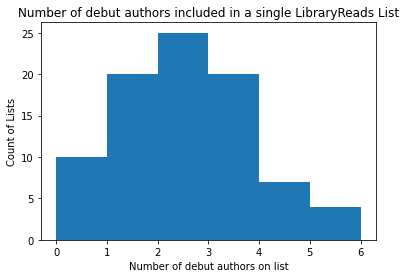

In [12]:
plt.hist(monthly_agg.debut, bins=range(7))
plt.xlabel('Number of debut authors on list')
plt.ylabel('Count of Lists')
plt.title('Number of debut authors included in a single LibraryReads List')
plt.show()

In [200]:
##Formal Analysis

#t-test unequal variances (Welch's t-test)
compare1_ttest = stats.ttest_ind(monthly_agg.loc[monthly_agg.hof_pd == 1]['debut'],monthly_agg.loc[monthly_agg.hof_compare1 == 1]['debut'],equal_var=False)
print('Group one compare t = {:.2f}, p = {:.2f}'.format(compare1_ttest[0],compare1_ttest[1]))
compare2_ttest = stats.ttest_ind(monthly_agg.loc[monthly_agg.hof_pd == 1]['debut'],monthly_agg.loc[monthly_agg.hof_compare2 == 1]['debut'],equal_var=False)
print('Group 2 compare t = {:.2f}, p = {:.2f}'.format(compare2_ttest[0],compare2_ttest[1]))
overall_ttest = stats.ttest_1samp(monthly_agg.loc[monthly_agg.hof_pd == 1]['debut'],monthly_agg['debut'].mean())
print('Population mean compare t = {:.2f}, p = {:.2f}'.format(overall_ttest[0],overall_ttest[1]))

Group one compare t = 0.42, p = 0.68
Group 2 compare t = 0.14, p = 0.89
Population mean compare t = 0.45, p = 0.66


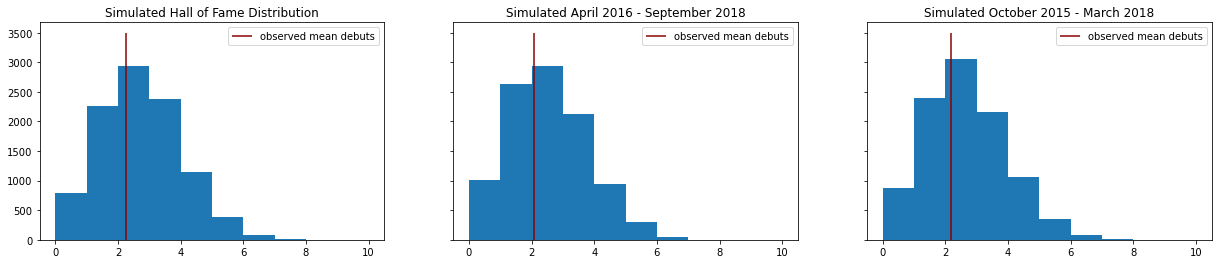

In [250]:
#on average, 20.7% of the books in a list for the the compare1 group are debuts
#if we generated a sample of 10 books with the same prevalence of debuts 10000 times, this would be the histogram of outcomes
figure,ax = plt.subplots(1,3,sharex=True,sharey=True,figsize=(21,4))
ax[0].hist(np.random.binomial(10,hof_pd_avg_debut/10,10000),bins=range(11))
ax[0].vlines(x=hof_pd_avg_debut,ymin=0,ymax=3500,color='darkred',label='observed mean debuts')
ax[0].title.set_text('Simulated Hall of Fame Distribution')
ax[1].hist(np.random.binomial(10,.207,10000),bins=range(11))
ax[1].vlines(x=hof_comp1_avg_debut,ymin=0,ymax=3500,color = 'darkred',label='observed mean debuts')
ax[1].title.set_text('Simulated April 2016 - September 2018')
ax[1].legend()
ax[2].hist(np.random.binomial(10,hof_comp2_avg_debut/10,10000),bins=range(11))
ax[2].vlines(x=hof_comp2_avg_debut,ymin=0,ymax=3500,color = 'darkred',label='observed mean debuts')
ax[2].title.set_text('Simulated October 2015 - March 2018')
ax[2].legend()

ax[0].legend()
plt.show()


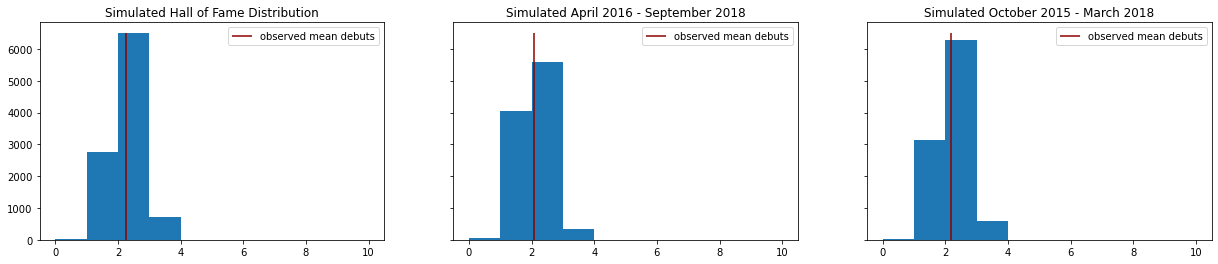

In [253]:
hof_poisson=np.zeros(10000)
comp1_poisson=np.zeros(10000)
comp2_poisson=np.zeros(10000)
for i in range(10000):
    comp1_poisson[i]=np.random.poisson(hof_comp1_avg_debut,10).mean()
    comp2_poisson[i]=np.random.poisson(hof_comp2_avg_debut,10).mean()
    hof_poisson[i]=np.random.poisson(hof_pd_avg_debut,10).mean()
figure,ax = plt.subplots(1,3,sharex=True,sharey=True,figsize=(21,4))
ax[0].hist(hof_poisson,bins=range(11))
ax[0].vlines(x=hof_pd_avg_debut,ymin=0,ymax=6500,color='darkred',label='observed mean debuts')
ax[0].title.set_text('Simulated Hall of Fame Distribution')
ax[1].hist(comp1_poisson,bins=range(11))
ax[1].vlines(x=hof_comp1_avg_debut,ymin=0,ymax=6500,color = 'darkred',label='observed mean debuts')
ax[1].title.set_text('Simulated April 2016 - September 2018')
ax[1].legend()
ax[2].hist(comp2_poisson,bins=range(11))
ax[2].vlines(x=hof_comp2_avg_debut,ymin=0,ymax=6500,color = 'darkred',label='observed mean debuts')
ax[2].title.set_text('Simulated October 2015 - March 2018')
ax[2].legend()

ax[0].legend()
plt.show()


In [257]:
debut_hof_pd_tot = monthly_agg.loc[monthly_agg.hof_pd==1]['debut'].sum()
hof_pd_tot = monthly_agg.loc[monthly_agg.hof_pd==1]['not_hof_count'].sum()
print(debut_hof_pd_tot,hof_pd_tot)
#bootstrap this
hof_debut_proportion = debut_hof_pd_tot / hof_pd_tot

65 290


280

In [169]:
len(monthly_agg.loc[monthly_agg.hof_pd == 1])

29

280 58


(array([9.640e+02, 2.642e+03, 3.040e+03, 2.077e+03, 9.070e+02, 2.870e+02,
        6.800e+01, 1.300e+01, 2.000e+00]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <BarContainer object of 9 artists>)

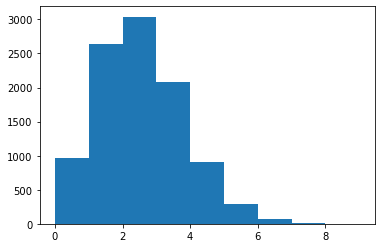

In [193]:
comp1_debuts = np.zeros(10000)
comp1_tot_debut = monthly_agg.loc[monthly_agg.hof_compare1==1].debut.sum()
comp1_tot = monthly_agg.loc[monthly_agg.hof_compare1 == 1].isbn_count.sum()
p_comp1_debut = comp1_tot_debut / comp1_tot
print(comp1_tot,comp1_tot_debut)
for i in range(len(comp1_debuts)):
    comp1_debuts = np.random.binomial(10,p_comp1_debut,len(comp1_debuts))

plt.hist(comp1_debuts, bins = range(10))


In [180]:
print(p_comp1_debut)

0.20714285714285716


In [190]:
np.random.binomial(280,p_comp1_debut,10) #expected debuts out of 280 books

array([59, 52, 58, 69, 55, 66, 51, 68, 56, 64])

In [270]:
hof_pd_books=monthly_agg.loc[monthly_agg.hof_pd==1].not_hof_count.sum()

In [271]:
hof_pd_books

290

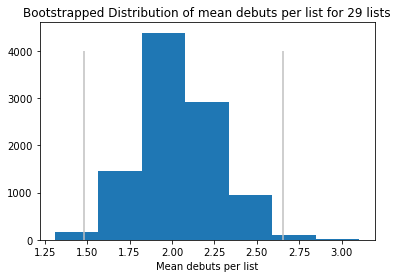

In [13]:
non_hof_pd = monthly_agg.loc[monthly_agg.hof_pd == 0]
bootstrap_means = np.zeros(10000)
bootstrap_max = np.zeros(10000)
for i in range(10000):
    iteration = non_hof_pd.sample(n=len(monthly_agg.loc[monthly_agg.hof_pd ==1]),replace=True)
    bootstrap_means[i] = iteration.debut.mean()
    bootstrap_max[i]= iteration.debut.max()

#99% confidence interval for mean
conf_int = np.quantile(bootstrap_means,q=[0.005,0.995])
lower_bound = conf_int[0]
upper_bound=conf_int[1]
plt.hist(bootstrap_means,bins=int(bootstrap_max.max())+1)
plt.xlabel('Mean debuts per list')
plt.title('Bootstrapped Distribution of mean debuts per list for 29 lists')
plt.vlines(x=lower_bound, ymin=0,ymax=4000,color='silver')
plt.vlines(x=upper_bound,ymin=0,ymax=4000,color='silver')
plt.show()

In [16]:
#99% confidence interval for mean
conf_int = np.quantile(bootstrap_means,q=[0.005,0.995])
lower_bound = conf_int[0]
upper_bound=conf_int[1]
conf_int2=np.quantile(bootstrap_means,q=[0.05,0.95])
lower_bound2=conf_int2[0]
upper_bound2=conf_int2[1]

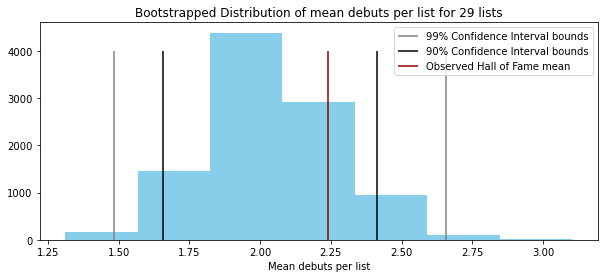

In [17]:
plt.figure(figsize=(10,4))
plt.hist(bootstrap_means,bins=int(bootstrap_max.max())+1,color='skyblue')
plt.xlabel('Mean debuts per list')
plt.title('Bootstrapped Distribution of mean debuts per list for 29 lists')
plt.vlines(x=lower_bound, ymin=0,ymax=4000,color='gray',label='99% Confidence Interval bounds')
plt.vlines(x=upper_bound,ymin=0,ymax=4000,color='gray')
plt.vlines(x=lower_bound2, ymin=0,ymax=4000,color='black',label = '90% Confidence Interval bounds')
plt.vlines(x=upper_bound2,ymin=0,ymax=4000,color='black')
plt.vlines(x=hof_pd_avg_debut,ymin=0,ymax=4000,color='darkred',label='Observed Hall of Fame mean')
plt.legend()
plt.show()

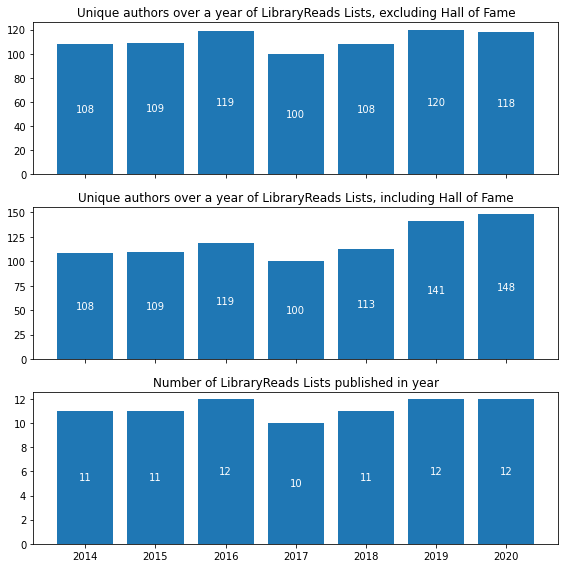

In [35]:
#authors per list
fig,ax=plt.subplots(3,1,sharex=True,figsize=(8,8))
authors=wide_df.loc[(wide_df.lr_hof==0) & ((wide_df.year != 2013) &(wide_df.year !=  2021))]['author'].groupby(wide_df.year).nunique()
authors_hof = wide_df.loc[((wide_df.year != 2013) &(wide_df.year !=  2021))]['author'].groupby(wide_df.year).nunique()
lr_list_count=wide_df.loc[(wide_df.lr_hof==0) & ((wide_df.year != 2013) &(wide_df.year !=  2021))]['lr_my'].groupby(wide_df.year).nunique()
labels=list(set(wide_df.year))
authors_bar = ax[0].bar(authors.index,authors)
ax[0].title.set_text('Unique authors over a year of LibraryReads Lists, excluding Hall of Fame')
ax[0].bar_label(authors_bar,label_type = 'center',color='white')
lr_list_bar = ax[2].bar(lr_list_count.index,lr_list_count)
ax[2].title.set_text('Number of LibraryReads Lists published in year')
ax[2].bar_label(lr_list_bar,label_type='center',color='white')
author_hof_bar = ax[1].bar(authors_hof.index,authors_hof)
ax[1].title.set_text('Unique authors over a year of LibraryReads Lists, including Hall of Fame')
ax[1].bar_label(author_hof_bar,label_type='center',color='white')
plt.tight_layout()
plt.show()

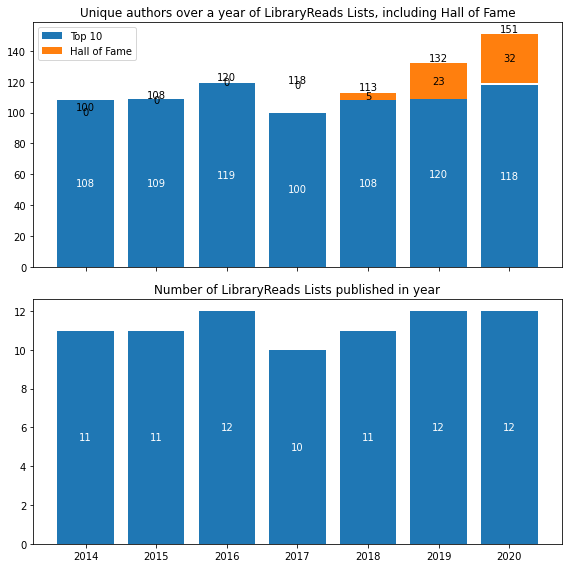

In [57]:
#authors per list
fig,ax=plt.subplots(2,1,sharex=True,figsize=(8,8))
authors=wide_df.loc[(wide_df.lr_hof==0) & ((wide_df.year != 2013) &(wide_df.year !=  2021))]['author'].groupby(wide_df.year).nunique()
authors_hof = wide_df.loc[(wide_df.lr_hof==1) &((wide_df.year != 2013) &(wide_df.year !=  2021))]['author'].groupby(wide_df.year).nunique()
for i in [2014,2015,2016,2017]:
    authors_hof[i]=0
lr_list_count=wide_df.loc[(wide_df.lr_hof==0) & ((wide_df.year != 2013) &(wide_df.year !=  2021))]['lr_my'].groupby(wide_df.year).nunique()
labels=list(set(wide_df.year))
authors_bar = ax[0].bar(authors.index,authors,label = 'Top 10')
ax[0].bar_label(authors_bar,label_type = 'center',color='white')
lr_list_bar = ax[1].bar(lr_list_count.index,lr_list_count)
ax[1].title.set_text('Number of LibraryReads Lists published in year')
ax[1].bar_label(lr_list_bar,label_type='center',color='white')
author_hof_bar = ax[0].bar(authors_hof.index,authors_hof,bottom=authors,label='Hall of Fame')
ax[0].title.set_text('Unique authors over a year of LibraryReads Lists, including Hall of Fame')
ax[0].bar_label(author_hof_bar,label_type='center')
ax[0].bar_label(author_hof_bar)
ax[0].legend()
plt.tight_layout()
plt.show()

In [55]:
wide_df['author'].groupby(wide_df.year).nunique()

year
2013     40
2014    108
2015    109
2016    119
2017    100
2018    113
2019    141
2020    148
2021     39
Name: author, dtype: int64

In [69]:
#Flag HoF in wide data
wide_df['hof_pd']=0
wide_df['hof_compare1']=0 #April 2016 - Sept 2018
wide_df['hof_compare2']=0 #Oct 2015 - Mar 2018
for i in wide_df.lr_my:
    if int(i[:4]) in hof_year:
        wide_df.loc[i,'hof_pd']=1
        wide_df.loc[i,'hof_compare1']=0
        wide_df.loc[i,'hof_compare2']=0
    elif int(i[:4]) == 2018 and i[-2:] in ('10','11','12'):
        wide_df.loc[i,'hof_pd']=1
        wide_df.loc[i,'hof_compare1']=0
        wide_df.loc[i,'hof_compare2']=0
    else:
        wide_df.loc[i,'hof_pd']=0
        if int(i[:4])==2018 and int(i[-2:]) in (1,2,3):
            wide_df.loc[i,'hof_compare1'] = 1
            wide_df.loc[i,'hof_compare2']=1
        elif int(i[:4]) == 2018 and int(i[-2:]) in (4, 5, 6, 7, 8, 9):
            wide_df.loc[i,'hof_compare1'] = 1
            wide_df.loc[i,'hof_compare2']= 0
        elif int(i[:4]) == 2017:
            wide_df.loc[i,'hof_compare1'] = 1
            wide_df.loc[i,'hof_compare2']=1
        elif int(i[:4]) == 2016 and int(i[-2:]) in (1, 2, 3):
            wide_df.loc[i,'hof_compare1'] = 0
            wide_df.loc[i,'hof_compare2']=1
        elif int(i[:4]) == 2016 and int(i[-2:]) in (4, 5, 6, 7, 8, 9, 10, 11, 12):
            wide_df.loc[i,'hof_compare1'] = 1
            wide_df.loc[i,'hof_compare2']=1
        elif int(i[:4]) == 2015 and int(i[-2:]) in (10,11, 12):
            wide_df.loc[i,'hof_compare1'] = 0
            wide_df.loc[i,'hof_compare2']=1
        else:
            wide_df.loc[i,'hof_compare1'] = 0
            wide_df.loc[i,'hof_compare2']=0



TypeError: 'float' object is not subscriptable

In [74]:
wide_df

Unnamed: 0    lr_my            author                      title  \
0               0.0  2021/03       Bennett, SJ  The Windsor Knot: A Novel   
1               1.0  2021/03  Briggs, Patricia                  Wild Sign   
2               2.0  2021/03       Desai, Sara            The Dating Plan   
3               3.0  2021/03     Doller, Trish                 Float Plan   
4               4.0  2021/03      Finlay, Alex   Every Last Fear: A Novel   
...             ...      ...               ...                        ...   
2014/01         NaN      NaN               NaN                        NaN   
2013/12         NaN      NaN               NaN                        NaN   
2013/11         NaN      NaN               NaN                        NaN   
2013/10         NaN      NaN               NaN                        NaN   
2013/09         NaN      NaN               NaN                        NaN   

                    pub_date             publisher          isbn  lr_top  \
0        2021-03-09 00:00:00        william morrow  9.780063e+12     0.0   
1        2021-03-16 00:00:00                   ace  9.780440e+12     0.0   
2        2021-03-16 00:00:00          berkley/jove  9.780593e+12     0.0   
3        2021-03-02 00:00:00  st. martin's griffin  9.781251e+12     0.0   
4        2021-03-02 00:00:00        minotaur books  9.781250e+12     0.0   
...                      ...                   ...           ...     ...   
2014/01                  NaN                   NaN           NaN     NaN   
2013/12                  NaN                   NaN           NaN     NaN   
2013/11                  NaN                   NaN           NaN     NaN   
2013/10                  NaN                   NaN           NaN     NaN   
2013/09                  NaN                   NaN           NaN     NaN   

         lr_hof  debut  ... genre_2 genre_3 genre_4 genre_5 genre_6 genre_7  \
0           0.0    0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1           1.0    0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           0.0    0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           0.0    1.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           0.0    0.0  ...     NaN     NaN     NaN     NaN     NaN     NaN   
...         ...    ...  ...     ...     ...     ...     ...     ...     ...   
2014/01     NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2013/12     NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2013/11     NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2013/10     NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2013/09     NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

           year hof_pd hof_compare1 hof_compare2  
0        2021.0      0            0            0  
1        2021.0      0            0            0  
2        2021.0      0            0            0  
3        2021.0      0            0            0  
4        2021.0      0            0            0  
...         ...    ...          ...          ...  
2014/01     NaN      0            0            0  
2013/12     NaN      0            0            0  
2013/11     NaN      0            0            0  
2013/10     NaN      0            0            0  
2013/09     NaN      0            0            0  

[1022 rows x 27 columns]

In [50]:
authors_hof = wide_df.loc[(wide_df.lr_hof==1) &((wide_df.year != 2013) &(wide_df.year !=  2021))]['author'].groupby(wide_df.year).nunique()
for i in [2014,2015,2016,2017]:
    authors_hof[i]=0
print(authors_hof)

year
2018     5
2019    23
2020    32
2014     0
2015     0
2016     0
2017     0
Name: author, dtype: int64


In [96]:
wide_df=pd.read_csv('wide_df_0424.csv')

In [97]:
wide_df=wide_df.drop(columns=['Unnamed: 0'])

In [98]:
#Flag HoF in wide data
wide_df['hof_pd']=0
wide_df['hof_compare1']=0 #April 2016 - Sept 2018
wide_df['hof_compare2']=0 #Oct 2015 - Mar 2018
len(wide_df)

936

In [105]:
hof_my_incl=['2018/10','2018/11','2018/12']
hof_comp1_my_excl=['2016/01','2016/02','2016/03']
hof_comp2_my_excl=['2015/11','2015/12']
hof_comp2_my_incl=['2018/01','2018/02','2018/03']
for j in range(len(wide_df)):
    if wide_df.loc[j,'year'] in [2019,2020,2021] or wide_df.loc[j,'lr_my'] in hof_my_incl:
        wide_df.loc[j,'hof_pd']=1
        wide_df.loc[j,'hof_compare1']=0
        wide_df.loc[j,'hof_compare2']=0
    elif wide_df.loc[j,'year'] in [2016, 2017,2018] and wide_df.loc[j,'lr_my'] not in hof_my_incl+hof_comp1_my_excl:
        wide_df.loc[j,'hof_pd']=0
        wide_df.loc[j,'hof_compare1']=1
        wide_df.loc[j,'hof_compare2']=0
    elif (wide_df.loc[j,'year'] in [2015,2016,2017] and wide_df.loc[j,'lr_my'] not in hof_comp2_my_excl) or wide_df.loc[j,'lr_my'] in hof_comp2_my_incl:
        wide_df.loc[j,'hof_pd']=0
        wide_df.loc[j,'hof_compare1']=0
        wide_df.loc[j,'hof_compare2']=1


lr_my            author                      title  \
0    2021/03       Bennett, SJ  The Windsor Knot: A Novel   
1    2021/03  Briggs, Patricia                  Wild Sign   
2    2021/03       Desai, Sara            The Dating Plan   
3    2021/03     Doller, Trish                 Float Plan   
4    2021/03      Finlay, Alex   Every Last Fear: A Novel   
..       ...               ...                        ...   
931  2013/09       Mott, Jason              Returned, The   
932  2013/09     Penny, Louise      How the Light Gets In   
933  2013/09    Pessl, Marisha                 Night Film   
934  2013/09   Rowell, Rainbow                    Fangirl   
935  2013/09     Searles, John       Help for the Haunted   

                pub_date             publisher           isbn  lr_top  lr_hof  \
0    2021-03-09 00:00:00        william morrow  9780063050006       0       0   
1    2021-03-16 00:00:00                   ace  9780440001584       0       1   
2    2021-03-16 00:00:00          berkley/jove  9780593100585       0       0   
3    2021-03-02 00:00:00  st. martin's griffin  9781250767943       0       0   
4    2021-03-02 00:00:00        minotaur books  9781250268822       0       0   
..                   ...                   ...            ...     ...     ...   
931  2013-08-27 00:00:00        harlequin mira  9780778315339       0       0   
932  2013-08-27 00:00:00        minotaur books  9780312655471       0       0   
933  2013-08-20 00:00:00          random house  9781400067886       0       0   
934  2013-09-10 00:00:00  st. martin's griffin  9781250030955       1       0   
935  2013-09-17 00:00:00        william morrow  9780060779634       0       0   

     debut lr_yfav  ... genre_2 genre_3 genre_4 genre_5 genre_6 genre_7  year  \
0        0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2021   
1        0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2021   
2        0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2021   
3        1     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2021   
4        0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2021   
..     ...     ...  ...     ...     ...     ...     ...     ...     ...   ...   
931      0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2013   
932      0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2013   
933      0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2013   
934      0    2014  ...     NaN     NaN     NaN     NaN     NaN     NaN  2013   
935      0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2013   

    hof_pd hof_compare1 hof_compare2  
0        1            0            0  
1        1            0            0  
2        1            0            0  
3        1            0            0  
4        1            0            0  
..     ...          ...          ...  
931      0            0            0  
932      0            0            0  
933      0            0            0  
934      0            0            0  
935      0            0            0  

[936 rows x 26 columns]

In [232]:
author_hof_counts = wide_df[wide_df.hof_pd==1].groupby(wide_df.year).author.value_counts()

In [203]:
mult_app_hof_pd = pd.DataFrame(author_hof_counts).loc[pd.DataFrame(author_hof_counts)['author'] >1]

In [230]:
mult_app_hof_pd_authors = []
for i in range(len(mult_app_hof_pd)):
    mult_app_hof_pd_authors.append(mult_app_hof_pd.index[i][1])


In [245]:
for name in mult_app_hof_pd_authors:
    print(name)
    display(wide_df.loc[(wide_df.author==name) & ((wide_df.year==2019) | (wide_df.year == 2020))][['lr_my','lr_hof']])

Lauren, Christina


lr_my  lr_hof
75   2020/10       1
161  2020/03       1
224  2019/10       1
286  2019/05       1
335  2019/01       0

Griffiths, Elly


lr_my  lr_hof
284  2019/05       1
306  2019/03       1

Guillory, Jasmine


lr_my  lr_hof
127  2020/06       1
221  2019/10       1
258  2019/07       1

Jewell, Lisa


lr_my  lr_hof
73   2020/10       1
210  2019/11       1
332  2019/01       0

McGuire, Seanan


lr_my  lr_hof
287  2019/05       1
337  2019/01       1

Adams, Lyssa Kay


lr_my  lr_hof
64   2020/10       1
157  2020/03       0
204  2019/11       0

Bailey, Tessa


lr_my  lr_hof
81   2020/09       1
183  2020/01       0
270  2019/06       0

Benedict, Marie


lr_my  lr_hof
40   2020/12       1
185  2020/01       1
329  2019/01       1

Butcher, Jim


lr_my  lr_hof
82   2020/09       0
108  2020/07       0

Cole, Alyssa


lr_my  lr_hof
43  2020/12       0
84  2020/09       0

Lauren, Christina


lr_my  lr_hof
75   2020/10       1
161  2020/03       1
224  2019/10       1
286  2019/05       1
335  2019/01       0

Singh, Nalini


lr_my  lr_hof
60   2020/11       1
135  2020/06       1
201  2019/12       0

In [231]:
temp_df

Empty DataFrame
Columns: []
Index: [Lauren, Christina, Griffiths, Elly, Guillory, Jasmine, Jewell, Lisa, McGuire, Seanan, Adams, Lyssa Kay, Bailey, Tessa, Benedict, Marie, Butcher, Jim, Cole, Alyssa, Lauren, Christina, Singh, Nalini]

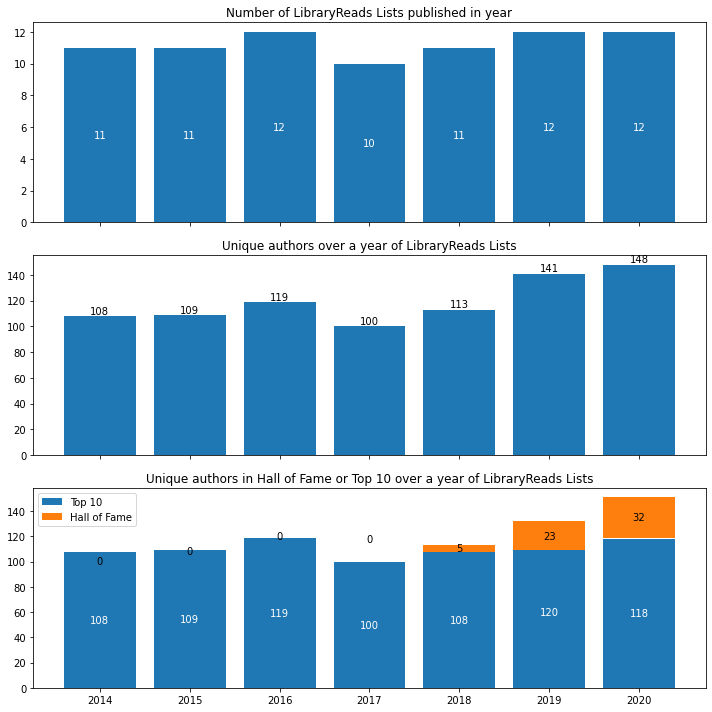

In [252]:
fig,ax=plt.subplots(3,1,sharex=True,figsize=(10,10))
authors=wide_df.loc[(wide_df.lr_hof==0) & ((wide_df.year != 2013) &(wide_df.year !=  2021))]['author'].groupby(wide_df.year).nunique()
authors_hof = wide_df.loc[(wide_df.lr_hof==1) &((wide_df.year != 2013) &(wide_df.year !=  2021))]['author'].groupby(wide_df.year).nunique()
overall_unique = wide_df.loc[(wide_df.year != 2013) &(wide_df.year !=  2021)]['author'].groupby(wide_df.year).nunique()
for i in [2014,2015,2016,2017]:
    authors_hof[i]=0
lr_list_count=wide_df.loc[(wide_df.lr_hof==0) & ((wide_df.year != 2013) &(wide_df.year !=  2021))]['lr_my'].groupby(wide_df.year).nunique()
labels=list(set(wide_df.year))

authors_bar = ax[2].bar(authors.index,authors,label = 'Top 10')
ax[2].bar_label(authors_bar,label_type = 'center',color='white')
lr_list_bar = ax[0].bar(lr_list_count.index,lr_list_count)
ax[0].title.set_text('Number of LibraryReads Lists published in year')
ax[0].bar_label(lr_list_bar,label_type='center',color='white')
author_hof_bar = ax[2].bar(authors_hof.index,authors_hof,bottom=authors,label='Hall of Fame')
ax[2].title.set_text('Unique authors in Hall of Fame or Top 10 over a year of LibraryReads Lists')
ax[2].bar_label(author_hof_bar,label_type='center')
ax[2].legend()
overall_bar = ax[1].bar(overall_unique.index,overall_unique)
ax[1].bar_label(overall_bar)
ax[1].title.set_text('Unique authors over a year of LibraryReads Lists')
plt.tight_layout()
plt.show()

In [266]:
#found another data cleaning incident: Short stories <> Short Stories
wide_df.loc[wide_df.genre=='Short stories']
wide_df.loc[789,'genre'] = 'Short Stories


In [300]:
#Again, data cleaning oops: Thiller <> Thriller
wide_df.loc[wide_df.genre=='Suspense/Thiller']
wide_df.loc[850,'genre']='Suspense/Thriller'

In [302]:
wide_df.to_csv('wide_df_0425.csv')

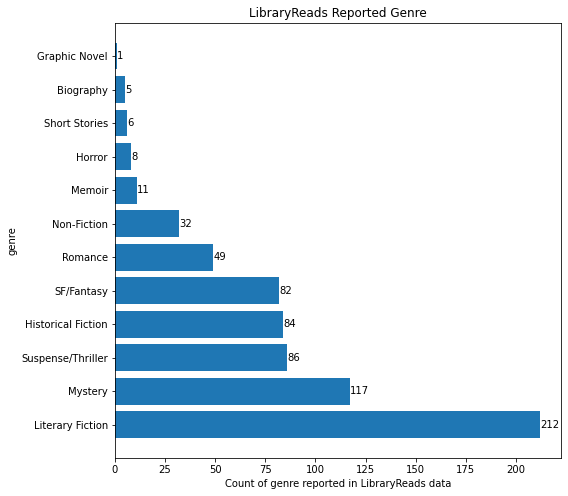

Literary Fiction      212
Mystery               117
Suspense/Thriller      86
Historical Fiction     84
SF/Fantasy             82
Romance                49
Non-Fiction            32
Memoir                 11
Horror                  8
Short Stories           6
Biography               5
Graphic Novel           1
Name: genre, dtype: int64

In [301]:
fig,ax=plt.subplots(figsize=(8,8))
genre_bar = ax.barh(wide_df.genre.value_counts().index,width=wide_df.genre.value_counts())
ax.set_xlabel('Count of genre reported in LibraryReads data')
ax.set_ylabel('genre')
ax.set_title('LibraryReads Reported Genre')
ax.bar_label(genre_bar)
plt.tight_layout
plt.show()

wide_df.genre.value_counts()

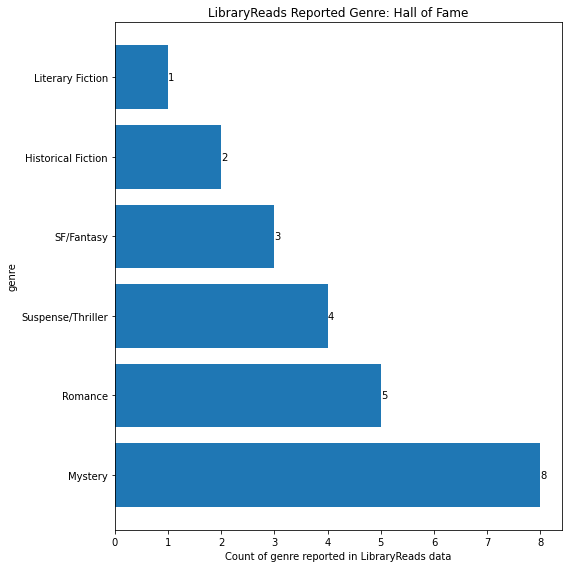

In [285]:
fig,ax=plt.subplots(figsize=(8,8))
genre_bar_hof = ax.barh(wide_df.loc[wide_df.lr_hof==1].genre.value_counts().index,width=wide_df.loc[wide_df.lr_hof==1].genre.value_counts())
ax.set_xlabel('Count of genre reported in LibraryReads data')
ax.set_ylabel('genre')
ax.set_title('LibraryReads Reported Genre: Hall of Fame')
ax.bar_label(genre_bar_hof)
plt.tight_layout()
plt.show()

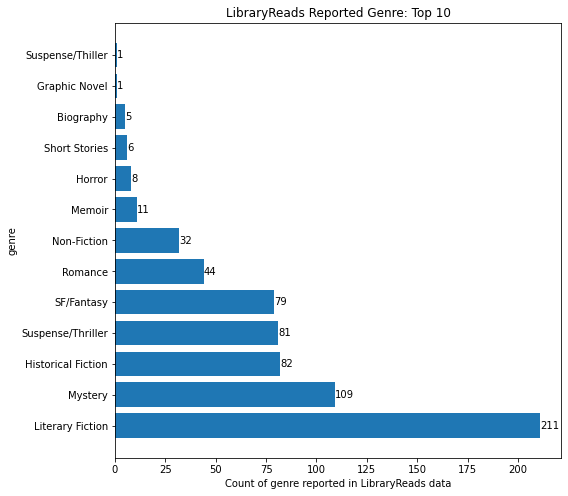

In [284]:
fig,ax=plt.subplots(figsize=(8,8))
genre_bar_top10 = ax.barh(wide_df.loc[wide_df.lr_hof==0].genre.value_counts().index,width=wide_df.loc[wide_df.lr_hof==0].genre.value_counts())
ax.set_xlabel('Count of genre reported in LibraryReads data')
ax.set_ylabel('genre')
ax.set_title('LibraryReads Reported Genre: Top 10')
ax.bar_label(genre_bar_top10)
plt.tight_layout
plt.show()



In [288]:
display(wide_df.groupby(wide_df.year).genre.value_counts())

year  genre             
2013  Historical Fiction     8
      Literary Fiction       8
      Mystery                7
      Non-Fiction            5
      Romance                4
                            ..
2019  SF/Fantasy            15
      Historical Fiction    12
      Mystery               10
      Non-Fiction            2
      Graphic Novel          1
Name: genre, Length: 68, dtype: int64

In [297]:
#StackOverflow code: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

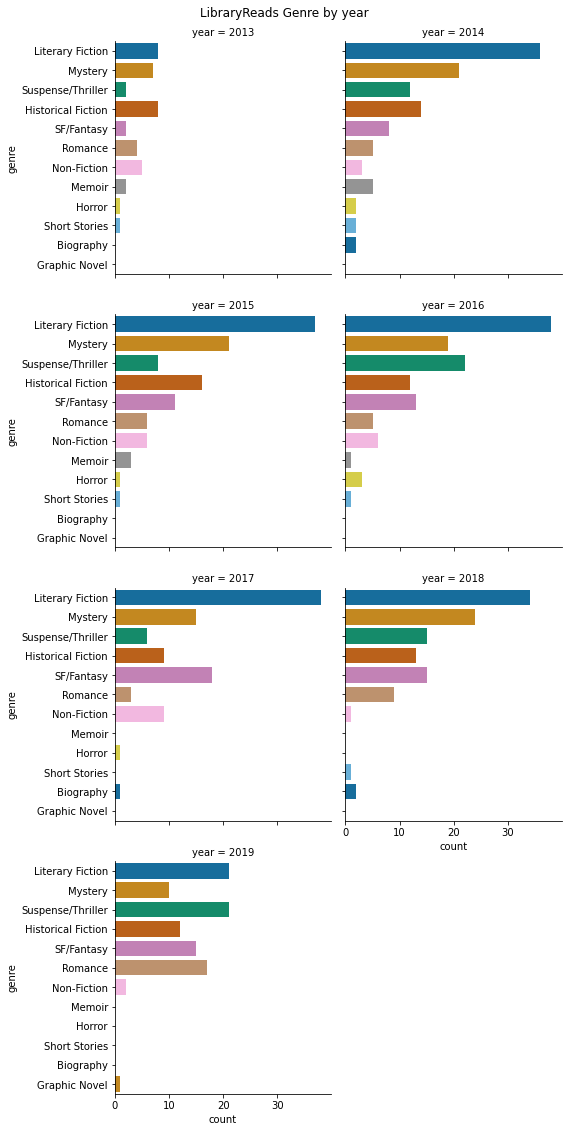

In [328]:
ordered_genres = wide_df.loc[(wide_df.year != 2020) &(wide_df.year != 2021)].genre.value_counts().index
facet = sns.catplot(y = 'genre', 
            data=wide_df.loc[(wide_df.year != 2020) &(wide_df.year != 2021)],
            kind='count',
            col = 'year', col_wrap = 2,
           height = 4, aspect = 1,
           order=ordered_genres,
           palette = 'colorblind')
plt.tight_layout()
facet.fig.subplots_adjust(top=0.95)
facet.fig.suptitle('LibraryReads Genre by year')
plt.show()


In [317]:
wide_df.groupby(wide_df.genre).pub_date.max().sort_values(ascending=False)

genre
SF/Fantasy            2019-08-27 00:00:00
Romance               2019-08-26 00:00:00
Suspense/Thriller     2019-08-20 00:00:00
Literary Fiction      2019-08-13 00:00:00
Mystery               2019-08-13 00:00:00
Historical Fiction    2019-07-30 00:00:00
Non-Fiction           2019-04-16 00:00:00
Graphic Novel         2019-02-26 00:00:00
Biography             2018-04-24 00:00:00
Short Stories         2018-04-24 00:00:00
Horror                2017-10-24 00:00:00
Memoir                2016-03-22 00:00:00
Name: pub_date, dtype: object

## Long Dataset analysis

In [2]:
long_df = pd.read_csv('long_df_eod418.csv')
long_df=long_df.drop(long_df.loc[(long_df.variable !='genre_0') & (long_df.value.isna())].index)
long_df = long_df.drop(columns=['Unnamed: 0'])
wide_df=pd.read_csv('wide_df_0425.csv')

In [3]:
long_df.value = long_df.value.str.replace(' ','_')

In [4]:
wide_df.drop(columns=['Unnamed: 0'])

lr_my            author                      title  \
0    2021/03       Bennett, SJ  The Windsor Knot: A Novel   
1    2021/03  Briggs, Patricia                  Wild Sign   
2    2021/03       Desai, Sara            The Dating Plan   
3    2021/03     Doller, Trish                 Float Plan   
4    2021/03      Finlay, Alex   Every Last Fear: A Novel   
..       ...               ...                        ...   
931  2013/09       Mott, Jason              Returned, The   
932  2013/09     Penny, Louise      How the Light Gets In   
933  2013/09    Pessl, Marisha                 Night Film   
934  2013/09   Rowell, Rainbow                    Fangirl   
935  2013/09     Searles, John       Help for the Haunted   

                pub_date             publisher           isbn  lr_top  lr_hof  \
0    2021-03-09 00:00:00        william morrow  9780063050006       0       0   
1    2021-03-16 00:00:00                   ace  9780440001584       0       1   
2    2021-03-16 00:00:00          berkley/jove  9780593100585       0       0   
3    2021-03-02 00:00:00  st. martin's griffin  9781250767943       0       0   
4    2021-03-02 00:00:00        minotaur books  9781250268822       0       0   
..                   ...                   ...            ...     ...     ...   
931  2013-08-27 00:00:00        harlequin mira  9780778315339       0       0   
932  2013-08-27 00:00:00        minotaur books  9780312655471       0       0   
933  2013-08-20 00:00:00          random house  9781400067886       0       0   
934  2013-09-10 00:00:00  st. martin's griffin  9781250030955       1       0   
935  2013-09-17 00:00:00        william morrow  9780060779634       0       0   

     debut lr_yfav  ... genre_2 genre_3 genre_4 genre_5 genre_6 genre_7  year  \
0        0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2021   
1        0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2021   
2        0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2021   
3        1     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2021   
4        0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2021   
..     ...     ...  ...     ...     ...     ...     ...     ...     ...   ...   
931      0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2013   
932      0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2013   
933      0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2013   
934      0    2014  ...     NaN     NaN     NaN     NaN     NaN     NaN  2013   
935      0     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN  2013   

    hof_pd hof_compare1 hof_compare2  
0        1            0            0  
1        1            0            0  
2        1            0            0  
3        1            0            0  
4        1            0            0  
..     ...          ...          ...  
931      0            0            0  
932      0            0            0  
933      0            0            0  
934      0            0            0  
935      0            0            0  

[936 rows x 26 columns]

In [6]:
#merge in LR genre, review, pub_date, author

long_df=pd.merge(long_df, wide_df,how='left', on = 'isbn')



In [7]:
long_df

isbn variable                          value  Unnamed: 0  \
0     9780063050006  genre_0                mystery_fiction           0   
1     9780440001584  genre_0                fantasy_fiction           1   
2     9780593100585  genre_0                   love_stories           2   
3     9781250767943  genre_0                   love_stories           3   
4     9781250268822  genre_0               suspense_fiction           4   
...             ...      ...                            ...         ...   
1451  9780062351425  genre_5                fantasy_fiction         688   
1452  9781681777665  genre_6                regency_fiction         391   
1453  9780062696793  genre_6  detective_and_mystery_fiction         412   
1454  9780062663115  genre_6                       novellas         472   
1455  9781681777665  genre_7                fantasy_fiction         391   

        lr_my                           author  \
0     2021/03                      Bennett, SJ   
1     2021/03                 Briggs, Patricia   
2     2021/03                      Desai, Sara   
3     2021/03                    Doller, Trish   
4     2021/03                     Finlay, Alex   
...       ...                              ...   
1451  2015/10  Fink, Joseph and Jeffrey Cranor   
1452  2018/07                  McElwain, Julie   
1453  2018/05                    Molloy, Aimee   
1454  2017/10                        Hill, Joe   
1455  2018/07                  McElwain, Julie   

                                   title             pub_date  \
0              The Windsor Knot: A Novel  2021-03-09 00:00:00   
1                              Wild Sign  2021-03-16 00:00:00   
2                        The Dating Plan  2021-03-16 00:00:00   
3                             Float Plan  2021-03-02 00:00:00   
4               Every Last Fear: A Novel  2021-03-02 00:00:00   
...                                  ...                  ...   
1451               Welcome to Night Vale  2015-10-20 00:00:00   
1452             Caught in Time: A Novel  2018-07-03 00:00:00   
1453         The Perfect Mother: A Novel  2018-05-01 00:00:00   
1454  Strange Weather: Four Short Novels  2017-10-24 00:00:00   
1455             Caught in Time: A Novel  2018-07-03 00:00:00   

                 publisher  lr_top  ...              genre_2  \
0           william morrow       0  ...                  NaN   
1                      ace       0  ...                  NaN   
2             berkley/jove       0  ...                  NaN   
3     st. martin's griffin       0  ...                  NaN   
4           minotaur books       0  ...                  NaN   
...                    ...     ...  ...                  ...   
1451      harper perennial       0  ...              fiction   
1452         pegasus books       0  ...              history   
1453                harper       0  ...  thrillers (fiction)   
1454        william morrow       0  ...              fiction   
1455         pegasus books       0  ...              history   

                    genre_3                        genre_4  \
0                       NaN                            NaN   
1                       NaN                            NaN   
2                       NaN                            NaN   
3                       NaN                            NaN   
4                       NaN                            NaN   
...                     ...                            ...   
1451     paranormal fiction  detective and mystery fiction   
1452     historical fiction            time-travel fiction   
1453    thrillers (fiction)  detective and mystery fiction   
1454  psychological fiction             paranormal fiction   
1455     historical fiction            time-travel fiction   

                            genre_5                        genre_6  \
0                               NaN                            NaN   
1                               NaN                            NaN   
2       

In [8]:
onehot_encoder_genre=OneHotEncoder(sparse = False)
onehot_data = onehot_encoder_genre.fit_transform(long_df[['value']])
onehot_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
onehot_encoder_genre.categories_

[array(['adventure_fiction', 'alternative_histories_(fiction)',
        'apocalyptic_fiction', 'autobiographical_comics',
        'autobiographical_fiction', 'autobiographies', 'bible_fiction',
        'bildungsromans', 'biographical_fiction', 'biographies',
        'black_humor_(literature)', 'chick_lit', 'choose-your-own_stories',
        'christian_fiction', 'christmas_stories',
        'comic_books,_strips,_etc', 'comics_(graphic_works)',
        'coming_of_age_fiction', 'cookbooks',
        'detective_and_mystery_fiction', 'diary_fiction',
        'domestic_fiction', 'dystopias', 'epic_fiction',
        'epistolary_fiction', 'essays', 'fantasy_fiction', 'fiction',
        'fiction_/_literary', 'ghost_stories', 'gothic_fiction',
        'graphic_novels', 'historical_fiction', 'history',
        'horror_fiction', 'humor', 'humorous_fiction', 'jewish_fiction',
        'juvenile_works', 'legal_stories', 'love_stories',
        'martial_arts_fiction', 'medical_fiction', 'musical_fictio

In [11]:
column_names=[]
for count, value in enumerate(onehot_encoder_genre.categories_[0]):
    column_names.append(value)

onehot_df_genre = pd.DataFrame(onehot_data,columns=column_names)
onehot_df_genre
onehot_df_genre = pd.merge(long_df,onehot_df_genre,how='left',left_index=True,right_index=True)

In [12]:
onehot_df_genre.tail()
#if genre_0 = NaN, that's meaningful - there's no LoC genre data. 
##But for all other genre_x variables, NaNs are just taking up space and memory 
##(and will just swamp anything else). Drop cases where genre_x <> genre_0 and value = NaN

isbn variable                          value  Unnamed: 0  \
1451  9780062351425  genre_5                fantasy_fiction         688   
1452  9781681777665  genre_6                regency_fiction         391   
1453  9780062696793  genre_6  detective_and_mystery_fiction         412   
1454  9780062663115  genre_6                       novellas         472   
1455  9781681777665  genre_7                fantasy_fiction         391   

        lr_my                           author  \
1451  2015/10  Fink, Joseph and Jeffrey Cranor   
1452  2018/07                  McElwain, Julie   
1453  2018/05                    Molloy, Aimee   
1454  2017/10                        Hill, Joe   
1455  2018/07                  McElwain, Julie   

                                   title             pub_date  \
1451               Welcome to Night Vale  2015-10-20 00:00:00   
1452             Caught in Time: A Novel  2018-07-03 00:00:00   
1453         The Perfect Mother: A Novel  2018-05-01 00:00:00   
1454  Strange Weather: Four Short Novels  2017-10-24 00:00:00   
1455             Caught in Time: A Novel  2018-07-03 00:00:00   

             publisher  lr_top  ...  spy_fiction  suspense_fiction  \
1451  harper perennial       0  ...          0.0               0.0   
1452     pegasus books       0  ...          0.0               0.0   
1453            harper       0  ...          0.0               0.0   
1454    william morrow       0  ...          0.0               0.0   
1455     pegasus books       0  ...          0.0               0.0   

     thrillers_(fiction) time-travel_fiction true_crime_stories  \
1451                 0.0                 0.0                0.0   
1452                 0.0                 0.0                0.0   
1453                 0.0                 0.0                0.0   
1454                 0.0                 0.0                0.0   
1455                 0.0                 0.0                0.0   

     utopian_fiction war_stories western_stories young_adult_fiction  NaN  
1451             0.0         0.0             0.0                 0.0  0.0  
1452             0.0         0.0             0.0                 0.0  0.0  
1453             0.0         0.0             0.0                 0.0  0.0  
1454             0.0         0.0             0.0                 0.0  0.0  
1455             0.0         0.0             0.0                 0.0  0.0  

[5 rows x 101 columns]

In [385]:
#No longer need this- did the transform before the encoding
onehot_df_genre=onehot_df_genre.drop(onehot_df_genre.loc[(onehot_df_genre.variable !='genre_0') & (onehot_df_genre.value.isna())].index)

In [618]:
onehot_df_genre.columns

Index([                           'isbn',                        'variable',
                                 'value',                           'lr_my',
                                'author',                           'title',
                              'pub_date',                       'publisher',
                                'lr_top',                          'lr_hof',
                                 'debut',                         'lr_yfav',
                                 'genre',                      'annotation',
                            'nom_lib_lr',                       'permalink',
                               'genre_0',                         'genre_1',
                               'genre_2',                         'genre_3',
                               'genre_4',                         'genre_5',
                               'genre_6',                         'genre_7',
                                  'year',                          'hof_pd',

In [16]:
onehot_df_genre

isbn variable                          value  Unnamed: 0  \
0     9780063050006  genre_0                mystery fiction           0   
1     9780440001584  genre_0                fantasy fiction           1   
2     9780593100585  genre_0                   love stories           2   
3     9781250767943  genre_0                   love stories           3   
4     9781250268822  genre_0               suspense fiction           4   
...             ...      ...                            ...         ...   
1451  9780062351425  genre_5                fantasy fiction         688   
1452  9781681777665  genre_6                regency fiction         391   
1453  9780062696793  genre_6  detective and mystery fiction         412   
1454  9780062663115  genre_6                       novellas         472   
1455  9781681777665  genre_7                fantasy fiction         391   

        lr_my                           author  \
0     2021/03                      Bennett, SJ   
1     2021/03                 Briggs, Patricia   
2     2021/03                      Desai, Sara   
3     2021/03                    Doller, Trish   
4     2021/03                     Finlay, Alex   
...       ...                              ...   
1451  2015/10  Fink, Joseph and Jeffrey Cranor   
1452  2018/07                  McElwain, Julie   
1453  2018/05                    Molloy, Aimee   
1454  2017/10                        Hill, Joe   
1455  2018/07                  McElwain, Julie   

                                   title             pub_date  \
0              The Windsor Knot: A Novel  2021-03-09 00:00:00   
1                              Wild Sign  2021-03-16 00:00:00   
2                        The Dating Plan  2021-03-16 00:00:00   
3                             Float Plan  2021-03-02 00:00:00   
4               Every Last Fear: A Novel  2021-03-02 00:00:00   
...                                  ...                  ...   
1451               Welcome to Night Vale  2015-10-20 00:00:00   
1452             Caught in Time: A Novel  2018-07-03 00:00:00   
1453         The Perfect Mother: A Novel  2018-05-01 00:00:00   
1454  Strange Weather: Four Short Novels  2017-10-24 00:00:00   
1455             Caught in Time: A Novel  2018-07-03 00:00:00   

                 publisher  lr_top  ...  spy fiction  suspense fiction  \
0           william morrow       0  ...          0.0               0.0   
1                      ace       0  ...          0.0               0.0   
2             berkley/jove       0  ...          0.0               0.0   
3     st. martin's griffin       0  ...          0.0               0.0   
4           minotaur books       0  ...          0.0               1.0   
...                    ...     ...  ...          ...               ...   
1451      harper perennial       0  ...          0.0               0.0   
1452         pegasus books       0  ...          0.0               0.0   
1453                harper       0  ...          0.0               0.0   
1454        william morrow       0  ...          0.0               0.0   
1455         pegasus books       0  ...          0.0               0.0   

     thrillers (fiction) time-travel fiction true crime stories  \
0                    0.0                 0.0                0.0   
1                    0.0                 0.0                0.0   
2                    0.0                 0.0                0.0   
3                    0.0                 0.0                0.0   
4                    0.0                 0.0                0.0   
...                  ...                 ...                ...   
1451                 0.0                 0.0                0.0   
1452                 0.0                 0.0                0.0   
1453                 0.0                 0.0                0.0   
1454                 0.0                 0.0                0.0   
1455                 0.0                 0.0                0.0   

     utopian fiction war stories weste

In [13]:
#PCA for visualization
pca = PCA(n_components=10)
pca_genre = pca.fit_transform(onehot_df_genre.loc[:,'adventure_fiction':])

In [513]:
onehot_df_genre.loc[:,'adventure_fiction':]

adventure_fiction  alternative_histories_(fiction)  apocalyptic_fiction  \
0                   0.0                              0.0                  0.0   
1                   0.0                              0.0                  0.0   
2                   0.0                              0.0                  0.0   
3                   0.0                              0.0                  0.0   
4                   0.0                              0.0                  0.0   
...                 ...                              ...                  ...   
1451                0.0                              0.0                  0.0   
1452                0.0                              0.0                  0.0   
1453                0.0                              0.0                  0.0   
1454                0.0                              0.0                  0.0   
1455                0.0                              0.0                  0.0   

      autobiographical_comics  autobiographical_fiction  autobiographies  \
0                         0.0                       0.0              0.0   
1                         0.0                       0.0              0.0   
2                         0.0                       0.0              0.0   
3                         0.0                       0.0              0.0   
4                         0.0                       0.0              0.0   
...                       ...                       ...              ...   
1451                      0.0                       0.0              0.0   
1452                      0.0                       0.0              0.0   
1453                      0.0                       0.0              0.0   
1454                      0.0                       0.0              0.0   
1455                      0.0                       0.0              0.0   

      bible_fiction  bildungsromans  biographical_fiction  biographies  ...  \
0               0.0             0.0                   0.0          0.0  ...   
1               0.0             0.0                   0.0          0.0  ...   
2               0.0             0.0                   0.0          0.0  ...   
3               0.0             0.0                   0.0          0.0  ...   
4               0.0             0.0                   0.0          0.0  ...   
...             ...             ...                   ...          ...  ...   
1451            0.0             0.0                   0.0          0.0  ...   
1452            0.0             0.0                   0.0          0.0  ...   
1453            0.0             0.0                   0.0          0.0  ...   
1454            0.0             0.0                   0.0          0.0  ...   
1455            0.0             0.0                   0.0          0.0  ...   

      spy_fiction  suspense_fiction  thrillers_(fiction)  time-travel_fiction  \
0             0.0               0.0                  0.0                  0.0   
1             0.0               0.0                  0.0                  0.0   
2             0.0               0.0                  0.0                  0.0   
3             0.0               0.0                  0.0                  0.0   
4             0.0               1.0                  0.0                  0.0   
...           ...               ...                  ...                  ...   
1451          0.0               0.0                  0.0                  0.0   
1452          0.0               0.0                  0.0                  0.0   
1453          0.0               0.0                  0.0                  0.0   
1454          0.0               0.0                  0.0                  0.0   
1455          0.0               0.0                  0.0                  0.0   

      true_crime_stories  utopian_fiction  war_stories  western_stories  \
0                    0.0              0.0          0.0              0.0   
1                    0.0              0.0       

In [14]:
pca.explained_variance_ratio_

array([0.19003513, 0.12609038, 0.10420099, 0.08163733, 0.0680496 ,
       0.06050674, 0.05463432, 0.05326808, 0.02978438, 0.02184673])

In [491]:
pca_genre

array([[-2.89861346e-01, -5.90631194e-01,  6.42711997e-01, ...,
        -7.02300267e-03, -4.79956975e-02,  8.76761779e-06],
       [-1.53086660e-01, -6.89950949e-02, -1.66340069e-01, ...,
         8.44699625e-01, -1.83491138e-01,  2.09501028e-05],
       [-2.07818905e-01, -1.36068898e-01, -5.59298265e-01, ...,
        -1.26662754e-02, -7.12402164e-02,  1.17987126e-05],
       ...,
       [-1.19615278e-01, -4.52798193e-02, -9.52416375e-02, ...,
         1.15856671e-02,  2.72198128e-01,  1.40000341e-04],
       [-1.11046037e-01, -4.03810936e-02, -8.27574790e-02, ...,
         8.59298882e-03,  1.45035221e-01, -1.81357695e-04],
       [-1.53086660e-01, -6.89950949e-02, -1.66340069e-01, ...,
         8.44699625e-01, -1.83491138e-01,  2.09501028e-05]])

<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

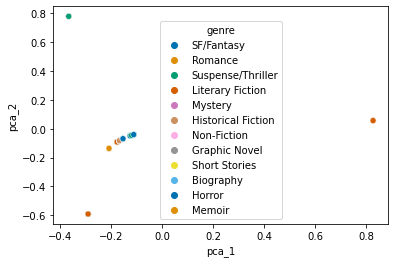

In [621]:
#take the first 8: explained variance ration > 0.05. None are great. 
long_df[['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8']]=pca_genre[:,:8]

sns.scatterplot(x='pca_1',y='pca_2',data = long_df, hue='genre',palette='colorblind')

In [492]:
long_df['genre']

0                     NaN
1                     NaN
2                     NaN
3                     NaN
4                     NaN
              ...        
1451           SF/Fantasy
1452           SF/Fantasy
1453    Suspense/Thriller
1454               Horror
1455           SF/Fantasy
Name: genre, Length: 1456, dtype: object

In [622]:
#nicest thing I can say is it's a bit of a bust. Pushing ahead anyway. 
lr_genre_list=[]
for i in range(12):
    lr_genre_list.append(long_df.genre.value_counts().index[i])

i = 1
genre_map={}
for j in range(12):
    genre_map[lr_genre_list[j]] = i + j

long_df['genre']=long_df['genre'].map(genre_map)
long_df['genre']
    

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1451    4.0
1452    4.0
1453    3.0
1454    8.0
1455    4.0
Name: genre, Length: 1456, dtype: float64

In [623]:
long_df_exclude = long_df.loc[long_df.genre.isna()].copy()
long_df_include = long_df.loc[long_df.genre.notna()].copy()

In [542]:
long_df.loc[long_df.value.isna()]

isbn variable value    lr_my                             author  \
6    9781616207014  genre_0   NaN  2021/03                 Greenidge, Kaitlyn   
7    9780062941275  genre_0   NaN  2021/03                     Hibbert, Talia   
8    9781524796402  genre_0   NaN  2021/03                 Kelly, Martha Hall   
9    9780778311010  genre_0   NaN  2021/03                      Penner, Sarah   
10   9780062943477  genre_0   NaN  2021/03                        Quinn, Kate   
..             ...      ...   ...      ...                                ...   
922  9780811221665  genre_0   NaN  2013/10                     Ridgway, Keith   
923  9781612193496  genre_0   NaN  2013/10       Saul, Nick and Andrea Curtis   
927  9780307718969  genre_0   NaN  2013/09                        Fink, Sheri   
930  9781451645606  genre_0   NaN  2013/09  Lindhout, Amanda and Sara Corbett   
934  9781250030955  genre_0   NaN  2013/09                    Rowell, Rainbow   

                                                 title             pub_date  \
6                                     Liberte: A Novel  2021-03-20 00:00:00   
7                     Act Your Age, Eve Brown: A Novel  2021-03-09 00:00:00   
8                           Sunflower Sisters: A Novel  2021-03-30 00:00:00   
9                         The Lost Apothecary: A Novel  2021-03-02 00:00:00   
10                              The Rose Code: A Novel  2021-03-09 00:00:00   
..                                                 ...                  ...   
922                                   Hawthorn & Child  2013-09-23 00:00:00   
923  The Stop: How the Fight for Good Food Transfor...  2013-09-24 00:00:00   
927                              Five Days at Memorial  2013-09-10 00:00:00   
930                                House in the Sky, A  2013-09-10 00:00:00   
934                                            Fangirl  2013-09-10 00:00:00   

                     publisher  lr_top  lr_hof  ...  hof_compare1  \
6              algonquin books       0       0  ...             0   
7                         avon       0       1  ...             0   
8             ballantine books       0       1  ...             0   
9               park row books       1       0  ...             0   
10   william morrow paperbacks       0       1  ...             0   
..                         ...     ...     ...  ...           ...   
922             new directions       0       0  ...             0   
923             melville house       0       0  ...             0   
927                      crown       0       0  ...             0   
930                   scribner       0       0  ...             0   
934       st. martin's griffin       1       0  ...             0   

    hof_compare2     pca_1     pca_2    pca_3     pca_4     pca_5     pca_6  \
6              0  0.826857  0.056636  0.07695  0.039392  0.013753  0.017166   
7              0  0.826857  0.056636  0.07695  0.039392  0.013753  0.017166   
8              0  0.826857  0.056636  0.07695  0.039392  0.013753  0.017166   
9              0  0.826857  0.056636  0.07695  0.039392  0.013753  0.017166   
10             0  0.826857  0.056636  0.07695  0.039392  0.013753  0.017166   
..           ...       ...       ...      ...       ...       ...       ...   
922            0  0.826857  0.056636  0.07695  0.039392  0.013753  0.017166   
923            0  0.826857  0.056636  0.07695  0.039392  0.013753  0.017166   
927            0  0.826857  0.056636  0.07695  0.039392  0.013753  0.017166   
930            0  0.826857  0.056636  0.07695  0.039392  0.013753  0.017166   
934            0  0.826857  0.056636  0.07695  0.039392  0.013753  0.017166   

        pca_7     pca_8  
6    0.001634 -0.002782  
7    0.001634 -0.002782  
8    0.001634 -0.002782  
9    0.001634 -0.002782  
10   0.001634 -0.002782  
..        ...       ...  
922  0.001634 -0.002782  
923  0.001634 -0.002782  
927  0.001634 -0.002782  
930  0.001634 -0.002782  
934  0.001634 -0.002782  

[

In [624]:
long_df_include.columns

Index(['isbn', 'variable', 'value', 'lr_my', 'author', 'title', 'pub_date',
       'publisher', 'lr_top', 'lr_hof', 'debut', 'lr_yfav', 'genre',
       'annotation', 'nom_lib_lr', 'permalink', 'genre_0', 'genre_1',
       'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7',
       'year', 'hof_pd', 'hof_compare1', 'hof_compare2', 'pca_1', 'pca_2',
       'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8'],
      dtype='object')

In [625]:
#Train-test split
x_train,x_test,y_train,y_test = train_test_split(long_df_include.loc[:,'pca_1':],long_df_include.genre,test_size=0.2) 
#logistic regression


In [626]:
mult_logit = LogisticRegression()
mult_logit.fit(x_train,y_train)

LogisticRegression()

In [566]:
mult_logit.coef_

array([[ 0.09395179, -0.29656769, -1.01028617,  0.01679641,  1.40168682,
         0.47643272, -0.43354994, -1.14525607],
       [-2.00553516,  0.09432982,  2.75258756, -0.44391592,  0.11201528,
        -0.06373556,  0.0068925 , -1.4903133 ],
       [-1.64448444,  0.82649301,  1.79055896,  0.02705586,  0.54962632,
        -1.17603918, -0.88848375, -0.98591481],
       [-0.68750468, -0.02934265, -0.49759488, -0.28510675, -0.78319338,
        -1.26763357,  0.58179238,  1.96485964],
       [-0.75167676, -0.11376013, -1.14276654, -0.43602905, -0.90181756,
         1.53073539,  0.46559188, -0.19373781],
       [-0.33138182, -0.37361192, -2.47823393,  1.09287596,  0.26802599,
         0.94158881,  0.6592123 ,  0.56399132],
       [ 2.15005723,  0.08886123,  0.06294962, -0.01135985, -0.3644617 ,
         0.48726417, -0.02827912,  0.06739478],
       [-0.78137802, -0.34958952,  0.37204605, -0.12616388, -0.23745007,
        -0.73393823, -0.14278427,  0.28157245],
       [ 1.81961658,  0.12229604

In [627]:
test_predict = mult_logit.predict(x_test)

In [628]:
(y_test == test_predict).value_counts()

False    128
True      99
Name: genre, dtype: int64

In [629]:
mult_logit.score(x_train,y_train)

0.43722466960352424

In [630]:
mult_logit.score(x_test,y_test)

0.43612334801762115

In [535]:
y_test.value_counts()

1.0     68
2.0     40
3.0     40
5.0     27
4.0     22
6.0     15
7.0      6
8.0      4
9.0      3
11.0     1
12.0     1
Name: genre, dtype: int64

In [571]:
print(genre_map)

{'Literary Fiction': 1, 'Mystery': 2, 'Suspense/Thriller': 3, 'SF/Fantasy': 4, 'Historical Fiction': 5, 'Romance': 6, 'Non-Fiction': 7, 'Horror': 8, 'Memoir': 9, 'Short Stories': 10, 'Biography': 11, 'Graphic Novel': 12}


In [631]:
predicted_excludes = mult_logit.predict(long_df_exclude.loc[:,'pca_1':])

In [632]:
long_df_exclude['predicted_genre'] = predicted_excludes

In [633]:
long_df_exclude

isbn variable                value    lr_my  \
0     9780063050006  genre_0      mystery_fiction  2021/03   
1     9780440001584  genre_0      fantasy_fiction  2021/03   
2     9780593100585  genre_0         love_stories  2021/03   
3     9781250767943  genre_0         love_stories  2021/03   
4     9781250268822  genre_0     suspense_fiction  2021/03   
...             ...      ...                  ...      ...   
1418  9780062679161  genre_4  thrillers_(fiction)  2020/07   
1419  9780062872852  genre_4         love_stories  2020/01   
1420  9781643851631  genre_4  thrillers_(fiction)  2019/12   
1442  9780062679161  genre_5     suspense_fiction  2020/07   
1443  9781643851631  genre_5     suspense_fiction  2019/12   

                        author                          title  \
0                  Bennett, SJ      The Windsor Knot: A Novel   
1             Briggs, Patricia                      Wild Sign   
2                  Desai, Sara                The Dating Plan   
3                Doller, Trish                     Float Plan   
4                 Finlay, Alex       Every Last Fear: A Novel   
...                        ...                            ...   
1418            Tremblay, Paul         Survivor Song: A Novel   
1419             Bailey, Tessa  Love Her or Lose Her: A Novel   
1420  Walters, Damien Angelica   The Dead Girls Club: A Novel   
1442            Tremblay, Paul         Survivor Song: A Novel   
1443  Walters, Damien Angelica   The Dead Girls Club: A Novel   

                 pub_date             publisher  lr_top  lr_hof  ...  \
0     2021-03-09 00:00:00        william morrow       0       0  ...   
1     2021-03-16 00:00:00                   ace       0       1  ...   
2     2021-03-16 00:00:00          berkley/jove       0       0  ...   
3     2021-03-02 00:00:00  st. martin's griffin       0       0  ...   
4     2021-03-02 00:00:00        minotaur books       0       0  ...   
...                   ...                   ...     ...     ...  ...   
1418  2020-07-07 00:00:00        william morrow       0       0  ...   
1419  2020-01-14 00:00:00                  avon       0       0  ...   
1420  2019-12-10 00:00:00    crooked lane books       0       0  ...   
1442  2020-07-07 00:00:00        william morrow       0       0  ...   
1443  2019-12-10 00:00:00    crooked lane books       0       0  ...   

      hof_compare2     pca_1     pca_2     pca_3     pca_4     pca_5  \
0                0 -0.289861 -0.590631  0.642712  0.146900  0.040978   
1                0 -0.153087 -0.068995 -0.166340 -0.182377 -0.132364   
2                0 -0.207819 -0.136069 -0.559298  0.726388  0.097255   
3                0 -0.207819 -0.136069 -0.559298  0.726388  0.097255   
4                0 -0.365884  0.778939  0.301583  0.103459  0.031412   
...            ...       ...       ...       ...       ...       ...   
1418             0 -0.124973 -0.048552 -0.103954 -0.088163 -0.043878   
1419             0 -0.207819 -0.136069 -0.559298  0.726388  0.097255   
1420             0 -0.124973 -0.048552 -0.103954 -0.088163 -0.043878   
1442             0 -0.365884  0.778939  0.301583  0.103459  0.031412   
1443             0 -0.365884  0.778939  0.301583  0.103459  0.031412   

         pca_6     pca_7     pca_8 predicted_genre  
0     0.046653  0.004179 -0.007023             2.0  
1    -0.342202 -0.138293  0.844699             4.0  
2     0.093700  0.007672 -0.012667             6.0  
3     0.093700  0.007672 -0.012667             6.0  
4     0.036901  0.003372 -0.005689             3.0  
...        ...       ...       ...             ...  
1418 -0.068803 -0.008015  0.014359             1.0  
1419  0.093700  0.007672 -0.012667             6.0  
1420 -0.068803 -0.008015  0.014359             1.0  
1442  0.036901  0.003372 -0.005689             3.0  
1443  0.036901  0.003372 -0.005689             3.0  

[321 rows x 37 columns]

In [552]:
genre_map.values()

dict_values([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [553]:
genre_map.keys()

dict_keys(['Literary Fiction', 'Mystery', 'Suspense/Thriller', 'SF/Fantasy', 'Historical Fiction', 'Romance', 'Non-Fiction', 'Horror', 'Memoir', 'Short Stories', 'Biography', 'Graphic Novel'])

In [554]:
genre_map_undo = {}

In [557]:
for i in range(len(genre_map)):
    genre_map_undo[list(genre_map.values())[i]]=list(genre_map.keys())[i]

In [558]:
genre_map_undo

{1: 'Literary Fiction',
 2: 'Mystery',
 3: 'Suspense/Thriller',
 4: 'SF/Fantasy',
 5: 'Historical Fiction',
 6: 'Romance',
 7: 'Non-Fiction',
 8: 'Horror',
 9: 'Memoir',
 10: 'Short Stories',
 11: 'Biography',
 12: 'Graphic Novel'}

In [634]:
long_df_include['predicted_genre'] = mult_logit.predict(long_df_include.loc[:,'pca_1':])

In [641]:
for i in range(len(long_df_exclude.index)):
    if long_df_exclude.index[i] in long_df_include.index:
        print(long_df_exclude.index[i])
        
print(long_df_include.shape,long_df_include.isbn.nunique())
print(long_df_exclude.shape,long_df_exclude.isbn.nunique())

(1135, 37) 693
(321, 37) 243


In [650]:
predicted_genre_df = long_df_include[['isbn','predicted_genre']]

In [663]:
predicted_genre_df = predicted_genre_df.append(long_df_exclude[['isbn','predicted_genre']])
predicted_genre_df.head()

isbn  predicted_genre
242  9780062878342              1.0
243  9781250047328              1.0
244  9781524796747              3.0
245  9781984823793              4.0
246  9780451489425              1.0

In [699]:
predicted_genre_df_copy = predicted_genre_df.copy() 
print(len(predicted_genre_df),predicted_genre_df.nunique())
for i in predicted_genre_df_copy.index:
    predicted_genre_df_copy.loc[i,'check']= str(predicted_genre_df_copy.loc[i,'isbn']) + '_' +str(predicted_genre_df_copy.loc[i,'predicted_genre'])
#predicted_genre_df_copy['check']=str(predicted_genre_df_copy['isbn']) + str(predicted_genre_df_copy['predicted_genre'])
predicted_genre_df_copy.head()

#predicted_genre_df_copy.check.nunique() 
#because this is the long data, each genre can lead to a different prediction. 
#To not have this take me another week and a half, just take the modal genre



1777 isbn               936
predicted_genre      6
dtype: int64


isbn  predicted_genre                check
242  9780062878342              1.0  9780062878342.0_1.0
243  9781250047328              1.0    9781250047328_1.0
244  9781524796747              3.0    9781524796747_3.0
245  9781984823793              4.0    9781984823793_4.0
246  9780451489425              1.0    9780451489425_1.0

In [700]:
#modal genre version 2
modal_genre_dict = {}
for j in predicted_genre_df.isbn.unique():
    modal_genre_dict[j] = np.random.choice(predicted_genre_df.loc[predicted_genre_df.isbn==j].predicted_genre.mode())

long_df['modal_genre']=long_df['isbn'].map(modal_genre_dict)

In [691]:
np.random.choice(predicted_genre_df_copy.loc[predicted_genre_df_copy.isbn==9780062068514].predicted_genre.mode())

4.0

In [702]:
predicted_genre_df.groupby('isbn').predicted_genre.nunique().max()

4

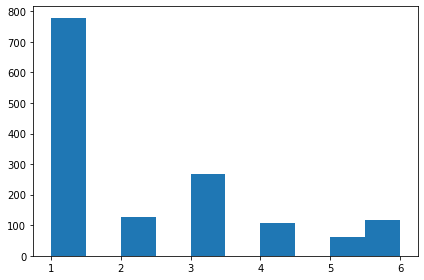

In [701]:
plt.hist(long_df.modal_genre)
plt.tight_layout()
plt.show()

In [ ]:
#modal genre attempt 1
for i in predicted_genre_df_copy.isbn.value_counts().index:
    if predicted_genre_df_copy.isbn.value_counts().loc[i] > 1:
        predicted_genre_df_copy.loc[i,'modal_genre'] = predicted_genre_df_copy.loc[predicted_genre_df_copy.isbn == i].predicted_genre.mode()
    else:
        predicted_genre_df_copy.loc[i,'modal_genre'] = predicted_genre_df.loc[i]

plt.hist(predicted_genre_df_copy.modal_genre)

In [674]:
predicted_genre_df_copy.isbn.unique()

array([9780062878342, 9781250047328, 9781524796747, 9781984823793,
       9780451489425, 9781984818232, 9781250317995, 9780812992861,
       9781984803788, 9780062878090, 9780062858085, 9781501188770,
       9780440000860, 9781250142863, 9781524744588, 9781250219657,
       9781984802194, 9781982135669, 9780062855312, 9780062390011,
       9780062692078, 9780525620754, 9781525834257, 9781524745141,
       9780399563058, 9780451491879, 9780399182105, 9780385537070,
       9780062872838, 9781524759780, 9781250174611, 9781594634734,
       9780525619246, 9781984802798, 9781984803252, 9781492689386,
       9780778307747, 9781501133480, 9781250126108, 9780425281291,
       9780062839053, 9780062862822, 9781328974648, 9780451490827,
       9781501128035, 9781250195524, 9781250316776, 9781250295637,
       9781984853752, 9781492671527, 9780525539889, 9780385543897,
       9781250200358, 9781683319979, 9781250120922, 9781524796372,
       9780374156022, 9780385541381, 9781400069996, 9781984822

In [656]:
predicted_genre_df_copy.loc[predicted_genre_df_copy.isbn == 9781681777665].predicted_genre.mode()

0    1.0
dtype: float64

In [654]:
predicted_genre_df.to_csv('diagnose problem.csv')

In [584]:
long_df = pd.merge(long_df,predicted_genre, how='left', left_index=True,right_index=True)

In [586]:
long_df['predicted_genre_2']=long_df['predicted_genre']

In [587]:
long_df['predicted_genre_2']=long_df['predicted_genre_2'].map(genre_map_undo)

In [589]:
long_df['predicted_genre_2'].value_counts()

Literary Fiction      777
Suspense/Thriller     176
Mystery               156
SF/Fantasy            143
Romance               118
Historical Fiction     86
Name: predicted_genre_2, dtype: int64

In [590]:
long_df['predicted_genre_2'].groupby(long_df.lr_hof).value_counts()

lr_hof  predicted_genre_2 
0       Literary Fiction      731
        Suspense/Thriller     158
        Mystery               140
        SF/Fantasy            131
        Romance               109
        Historical Fiction     81
1       Literary Fiction       46
        Suspense/Thriller      18
        Mystery                16
        SF/Fantasy             12
        Romance                 9
        Historical Fiction      5
Name: predicted_genre_2, dtype: int64

In [601]:
prediction_analysis_df = long_df.loc[:,'isbn':].copy()

In [602]:
prediction_analysis_df=prediction_analysis_df.drop(columns=['value','variable','pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8','genre_1','genre_2','genre_3','genre_4','genre_5','genre_6','genre_7','genre_0'])

In [603]:
prediction_analysis_df

isbn    lr_my                           author  \
0     9780063050006  2021/03                      Bennett, SJ   
1     9780440001584  2021/03                 Briggs, Patricia   
2     9780593100585  2021/03                      Desai, Sara   
3     9781250767943  2021/03                    Doller, Trish   
4     9781250268822  2021/03                     Finlay, Alex   
...             ...      ...                              ...   
1451  9780062351425  2015/10  Fink, Joseph and Jeffrey Cranor   
1452  9781681777665  2018/07                  McElwain, Julie   
1453  9780062696793  2018/05                    Molloy, Aimee   
1454  9780062663115  2017/10                        Hill, Joe   
1455  9781681777665  2018/07                  McElwain, Julie   

                                   title             pub_date  \
0              The Windsor Knot: A Novel  2021-03-09 00:00:00   
1                              Wild Sign  2021-03-16 00:00:00   
2                        The Dating Plan  2021-03-16 00:00:00   
3                             Float Plan  2021-03-02 00:00:00   
4               Every Last Fear: A Novel  2021-03-02 00:00:00   
...                                  ...                  ...   
1451               Welcome to Night Vale  2015-10-20 00:00:00   
1452             Caught in Time: A Novel  2018-07-03 00:00:00   
1453         The Perfect Mother: A Novel  2018-05-01 00:00:00   
1454  Strange Weather: Four Short Novels  2017-10-24 00:00:00   
1455             Caught in Time: A Novel  2018-07-03 00:00:00   

                 publisher  lr_top  lr_hof  debut lr_yfav  genre  \
0           william morrow       0       0      0     NaN    NaN   
1                      ace       0       1      0     NaN    NaN   
2             berkley/jove       0       0      0     NaN    NaN   
3     st. martin's griffin       0       0      1     NaN    NaN   
4           minotaur books       0       0      0     NaN    NaN   
...                    ...     ...     ...    ...     ...    ...   
1451      harper perennial       0       0      1     NaN    4.0   
1452         pegasus books       0       0      0     NaN    4.0   
1453                harper       0       0      1     NaN    3.0   
1454        william morrow       0       0      0     NaN    8.0   
1455         pegasus books       0       0      0     NaN    4.0   

                                             annotation  \
0     “When a mysterious death occurs at Windsor Cas...   
1     “Mated werewolves Charles and Anna investigate...   
2     “Daisy is shocked at a tech conference when sh...   
3     After the death of her fiancé, Anna decides to...   
4     “A mystery wrapped in a mystery, this tightly ...   
...                                                 ...   
1451  From the creators of the popular podcast about...   
1452                                                NaN   
1453                                                NaN   
1454                                                NaN   
1455                                                NaN   

                                             nom_lib_lr  \
0     Jennifer Williams, Normal Public Library, Norm...   
1     Linda Tilden, Mount Laurel Public Library, Mou...   
2     Laura Bonds, Harris County Public Library, Hou...   
3     Sandra Woodbury, Burlington Public Library, Bu...   
4     Maggie Thomann, Northbrook Public Library, Nor...   
...                                                 ...   
1451  Debra Franklin, York County Public Library, Ro...   
1452  Melissa Barber, Lubbock Public Library, Lubboc...   
1453  Jennifer Winberry, Hunterdon County Library, F...   
1454  Jennifer Wilson, Delphi Public Library, Delphi...   
1455  Melissa Barber, Lubbock Public Library, Lubboc...   

                            permalink  year  hof_pd  hof_compare1  \
0     https://lccn.loc.gov/2020023920  2021       1             0   
1     https://lccn.loc.gov/2020052785  2021       1             0   
2     https

In [607]:
prediction_analysis_df=prediction_analysis_df.drop_duplicates()

In [609]:
len(prediction_analysis_df)
prediction_analysis_df.isbn.nunique()

936

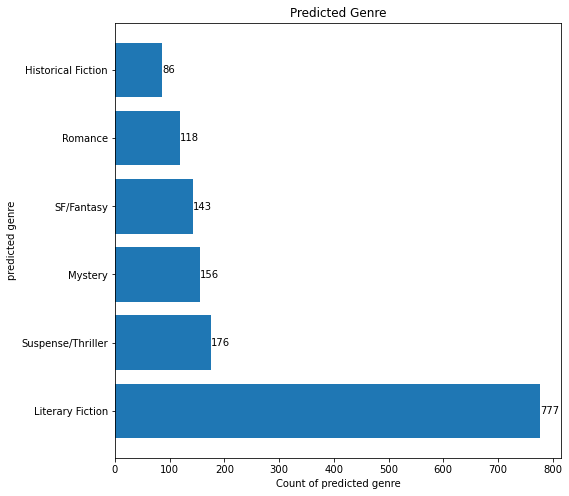

In [606]:
fig,ax=plt.subplots(figsize=(8,8))
genre_bar = ax.barh(prediction_analysis_df.predicted_genre_2.value_counts().index,width=prediction_analysis_df.predicted_genre_2.value_counts())
ax.set_xlabel('Count of predicted genre')
ax.set_ylabel('predicted genre')
ax.set_title('Predicted Genre')
ax.bar_label(genre_bar)
plt.tight_layout
plt.show()


In [73]:
#accuracy:
long_df = pd.read_csv('C:/Users/Aryn/Documents/GitHub/INFO2950/long_df_eod418.csv')

#if genre_0 = NaN, that's meaningful - there's no LoC genre data. 
##But for all other genre_x variables, NaNs are just taking up space and memory 
##(and will just swamp anything else). Drop cases where genre_x <> genre_0 and value = NaN

long_df=long_df.drop(long_df.loc[(long_df.variable !='genre_0') & (long_df.value.isna())].index)
long_df = long_df.drop(columns=['Unnamed: 0'])
long_df.value = long_df.value.str.replace(' ','_')
long_df=pd.merge(long_df, wide_df,how='left', on = 'isbn')

LibofCongress_genres = long_df.value.value_counts()
mult_app = len(LibofCongress_genres.loc[LibofCongress_genres > 1])
long_df_exclude = long_df.loc[long_df.genre.isna()]
long_df_include = long_df.loc[long_df.genre.notna()]
loc_non_nan_count = len(long_df_include)

onehot_encoder_genre=OneHotEncoder(sparse = False)
onehot_data = onehot_encoder_genre.fit_transform(long_df[['value']])
onehot_data.shape
column_names=[]
for count, value in enumerate(onehot_encoder_genre.categories_[0]):
    column_names.append(value)

onehot_df_genre = pd.DataFrame(onehot_data,columns=column_names)
onehot_df_genre = pd.merge(long_df,onehot_df_genre,how='left',left_index=True,right_index=True)

pca = PCA(n_components=8)
pca_genre = pca.fit_transform(onehot_df_genre.loc[:,'adventure_fiction':])
long_df[['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8']]=pca_genre[:,:8]

lr_genre_list=[]
for i in range(12):
    lr_genre_list.append(long_df.genre.value_counts().index[i])

genre_map={}
for j in range(12):
    genre_map[lr_genre_list[j]] = 1 + j

long_df['genre']=long_df['genre'].map(genre_map)
long_df_exclude = long_df.loc[long_df.genre.isna()].copy() #no LibraryReads assigned genre
long_df_include = long_df.loc[long_df.genre.notna()].copy() #has assigned LibraryReads genre

#Train-test split
x_train,x_test,y_train,y_test = train_test_split(long_df_include.loc[:,'pca_1':],long_df_include.genre,test_size=0.2) 

mult_logit = LogisticRegression()
mult_logit.fit(x_train,y_train)
test_predict = mult_logit.predict(x_test)
train_score = mult_logit.score(x_train,y_train)
test_score = mult_logit.score(x_test,y_test)

long_df_exclude['predicted_genre'] = mult_logit.predict(long_df_exclude.loc[:,'pca_1':])
long_df_include['predicted_genre'] = mult_logit.predict(long_df_include.loc[:,'pca_1':])

predicted_genre_df = long_df_include[['isbn','predicted_genre']]
predicted_genre_df = predicted_genre_df.append(long_df_exclude[['isbn','predicted_genre']])

modal_genre_dict = {}
for j in predicted_genre_df.isbn.unique():
    modal_genre_dict[j] = np.random.choice(predicted_genre_df.loc[predicted_genre_df.isbn==j].predicted_genre.mode())

long_df['modal_genre']=long_df['isbn'].map(modal_genre_dict)
wide_df['modal_genre']=wide_df['isbn'].map(modal_genre_dict)

#map back to strings for predicted genre (easier to read)
genre_map_undo = {}
for i in range(len(genre_map)):
    genre_map_undo[list(genre_map.values())[i]]=list(genre_map.keys())[i]

wide_df['modal_genre_descr'] = wide_df['modal_genre'].map(genre_map_undo)
len(wide_df.loc[wide_df.genre==wide_df.modal_genre_descr])/len(wide_df)

0.3482905982905983

# Sample List: pre-HOF

In [74]:
#proportion of each genre out of the total in the pre-HOF period

#from  pre-HOF, pick 10, average of each predicted genre
wide_df_prehof=wide_df.loc[wide_df.hof_pd == 0].copy()


In [203]:
#wide_df_prehof.modal_genre_descr = wide_df.modal_genre_descr.str.replace(' ','_')
modal_genre_list= wide_df.modal_genre_descr.value_counts().index
iteration = wide_df.loc[wide_df.hof_pd == 0].sample(10,replace=True)
iterations = 10
iteration_df = pd.DataFrame(np.zeros((iterations,6)), columns=modal_genre_list)
for j in range(iterations):
    iteration = wide_df_prehof.sample(10)
    for i in modal_genre_list:
        iteration_df.loc[j,i] = iteration.loc[iteration.modal_genre_descr==i].modal_genre_descr.count()/10
r=0
modal_genre_sim_stats=[[],[],[],[],[],[]]
for k in modal_genre_list:
    lower_bound_genre = np.quantile(iteration_df[k],q=[0.025,0.975])[0]
    upper_bound_genre = np.quantile(iteration_df[k],q=[0.025,0.975])[1]
    genre_mean = iteration_df[k].mean()
    print('Mean proportion of',k,'in simulated lists = {:.2f}, 95% confidence interval = ({:.2f},{:.2f})'.format(genre_mean,lower_bound_genre,upper_bound_genre))
    modal_genre_sim_stats[r]=[k,genre_mean,lower_bound_genre,upper_bound_genre]
    r = r+1

Mean proportion of Literary Fiction in simulated lists = 0.60, 95% confidence interval = (0.42,0.86)
Mean proportion of Suspense/Thriller in simulated lists = 0.09, 95% confidence interval = (0.00,0.20)
Mean proportion of Mystery in simulated lists = 0.07, 95% confidence interval = (0.00,0.20)
Mean proportion of Romance in simulated lists = 0.06, 95% confidence interval = (0.00,0.20)
Mean proportion of SF/Fantasy in simulated lists = 0.10, 95% confidence interval = (0.02,0.18)
Mean proportion of Historical Fiction in simulated lists = 0.08, 95% confidence interval = (0.00,0.18)


In [191]:

modal_genre_sim_stats[0]

[1, 2, 3, 4]

In [102]:
hof_my = wide_df.loc[wide_df.hof_pd==1].lr_my.value_counts().index
observed=pd.DataFrame(np.zeros((len(hof_my),6)),index=hof_my,columns=modal_genre_list)
for my in hof_my:
    for m in modal_genre_list:
        observed.loc[my,m] = len(wide_df.loc[(wide_df.lr_my == my) & (wide_df.modal_genre_descr == m) & (wide_df.hof_pd ==1)& (wide_df.lr_hof==0)])/10

In [106]:
observed.mean()

Literary Fiction      0.603448
Suspense/Thriller     0.100000
Mystery               0.068966
Romance               0.144828
SF/Fantasy            0.058621
Historical Fiction    0.024138
dtype: float64

In [107]:
wide_df.columns

Index(['Unnamed: 0', 'lr_my', 'author', 'title', 'pub_date', 'publisher',
       'isbn', 'lr_top', 'lr_hof', 'debut', 'lr_yfav', 'genre', 'annotation',
       'nom_lib_lr', 'permalink', 'genre_0', 'genre_1', 'genre_2', 'genre_3',
       'genre_4', 'genre_5', 'genre_6', 'genre_7', 'year', 'hof_pd',
       'hof_compare1', 'hof_compare2', 'modal_genre', 'modal_genre_descr'],
      dtype='object')

In [110]:
for i in range(len(wide_df)):
    wide_df.loc[i,'concat_genre']=str(wide_df.loc[i,'genre_0']) + str(wide_df.loc[i,'genre_1'])+ str(wide_df.loc[i,'genre_2'])+ str(wide_df.loc[i,'genre_3'])+ str(wide_df.loc[i,'genre_4'])+str(wide_df.loc[i,'genre_5'])+str(wide_df.loc[i,'genre_6'])+ str(wide_df.loc[i,'genre_7'])

In [111]:
wide_df.concat_genre.nunique()

204

In [112]:
wide_df.permalink.nunique()

865

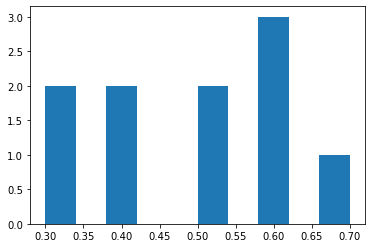

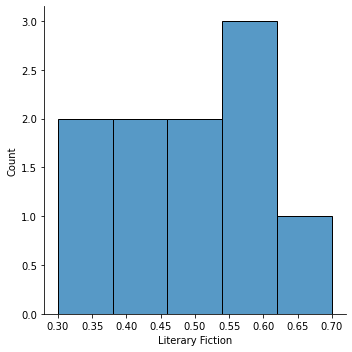

In [127]:
plt.hist(iteration_df['Literary Fiction'])
plt.show()
sns.displot(data=iteration_df, x = iteration_df['Literary Fiction'])
plt.show()

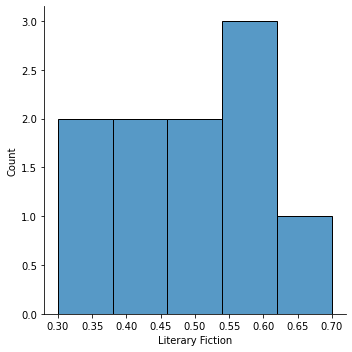

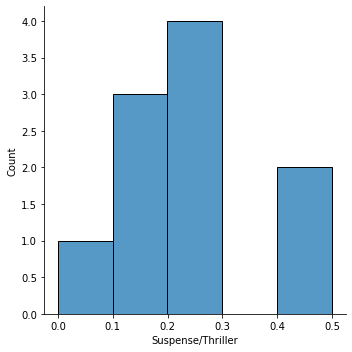

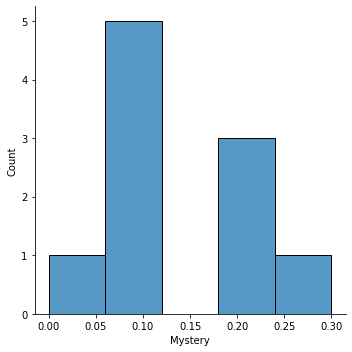

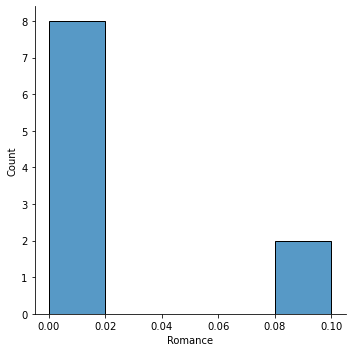

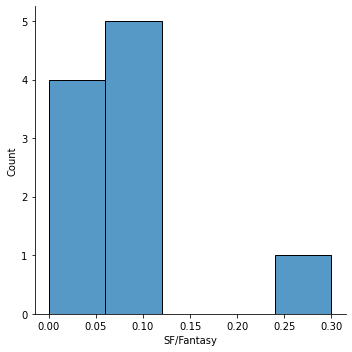

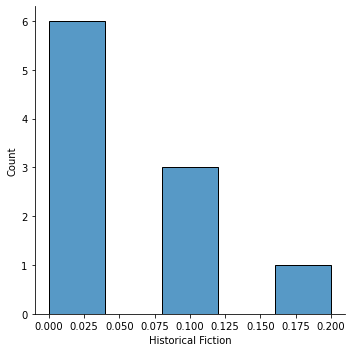

In [136]:
for i in range(len(iteration_df.columns)):
    sns.displot(data=iteration_df, x = iteration_df.columns[i])
    

In [150]:
#fig,axs=plt.subplots(3,2,sharex=True, sharey=True, figsize=(10,10))
axes_pairs = ['axs[0,0]','axs[0,1]','axs[1,0]','axs[1,1]','axs[2,0]','axs[2,1]']
for i in range(len(iteration_df.columns)):
    print('sns.histplot(data=iteration_df, x=',iteration_df.columns[i],',ax=',axes_pairs[i])

sns.histplot(data=iteration_df, x= Literary Fiction ,ax= axs[0,0]
sns.histplot(data=iteration_df, x= Suspense/Thriller ,ax= axs[0,1]
sns.histplot(data=iteration_df, x= Mystery ,ax= axs[1,0]
sns.histplot(data=iteration_df, x= Romance ,ax= axs[1,1]
sns.histplot(data=iteration_df, x= SF/Fantasy ,ax= axs[2,0]
sns.histplot(data=iteration_df, x= Historical Fiction ,ax= axs[2,1]


In [152]:
fig,axs=plt.subplots(3,2,sharex=True, sharey=True, figsize=(10,10))
sns.histplot(data=iteration_df, x= 'Literary Fiction' ,ax= axs[0,0]
sns.histplot(data=iteration_df, x= 'Suspense/Thriller' ,ax= axs[0,1]
sns.histplot(data=iteration_df, x= 'Mystery ',ax= axs[1,0]
sns.histplot(data=iteration_df, x= 'Romance' ,ax= axs[1,1]
sns.histplot(data=iteration_df, x= 'SF/Fantasy' ,ax= axs[2,0]
sns.histplot(data=iteration_df, x= 'Historical Fiction' ,ax= axs[2,1]

SyntaxError: invalid syntax (<ipython-input-152-4b8c112fe2e1>, line 3)

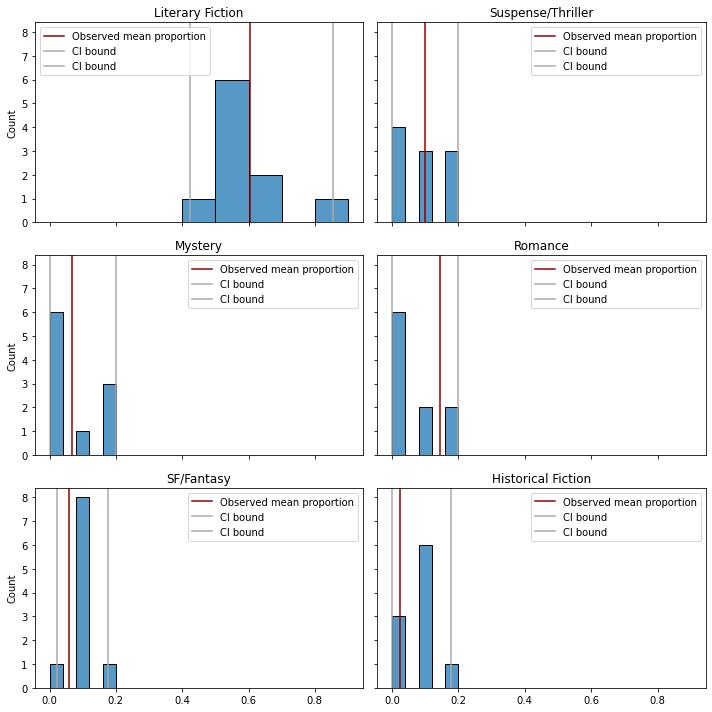

In [211]:
fig,axs=plt.subplots(3,2,sharex=True, sharey=True, figsize = (10,10))
sns.histplot(data=iteration_df,x='Literary Fiction',ax=axs[0,0])
axs[0,0].title.set_text('Literary Fiction')
axs[0,0].axvline(observed['Literary Fiction'].mean(),color='darkred',label='Observed mean proportion')
axs[0,0].axvline(modal_genre_sim_stats[0][2], color='darkgrey',label='CI bound')
axs[0,0].axvline(modal_genre_sim_stats[0][3], color='darkgrey',label='CI bound')
axs[0,0].legend()
sns.histplot(data=iteration_df,x='Suspense/Thriller',ax=axs[0,1])
axs[0,1].title.set_text('Suspense/Thriller')
axs[0,1].axvline(observed['Suspense/Thriller'].mean(),color='darkred',label='Observed mean proportion')
axs[0,1].axvline(modal_genre_sim_stats[1][2], color='darkgrey',label='CI bound')
axs[0,1].axvline(modal_genre_sim_stats[1][3], color='darkgrey',label='CI bound')
axs[0,1].legend()
sns.histplot(data=iteration_df,x='Mystery',ax=axs[1,0])
axs[1,0].title.set_text('Mystery')
axs[1,0].axvline(observed['Mystery'].mean(),color='darkred',label='Observed mean proportion')
axs[1,0].axvline(modal_genre_sim_stats[2][2], color='darkgrey',label='CI bound')
axs[1,0].axvline(modal_genre_sim_stats[2][3], color='darkgrey',label='CI bound')
axs[1,0].legend()
sns.histplot(data=iteration_df,x='Romance',ax=axs[1,1])
axs[1,1].title.set_text('Romance')
axs[1,1].axvline(observed['Romance'].mean(),color='darkred',label='Observed mean proportion')
axs[1,1].axvline(modal_genre_sim_stats[3][2], color='darkgrey',label='CI bound')
axs[1,1].axvline(modal_genre_sim_stats[3][3], color='darkgrey',label='CI bound')
axs[1,1].legend()
sns.histplot(data=iteration_df,x='SF/Fantasy',ax=axs[2,0])
axs[2,0].title.set_text('SF/Fantasy')
axs[2,0].axvline(observed['SF/Fantasy'].mean(),color='darkred',label='Observed mean proportion')
axs[2,0].set_xlabel('')
axs[2,0].axvline(modal_genre_sim_stats[4][2], color='darkgrey',label='CI bound')
axs[2,0].axvline(modal_genre_sim_stats[4][3], color='darkgrey',label='CI bound')
axs[2,0].legend()
sns.histplot(data=iteration_df,x='Historical Fiction',ax=axs[2,1])
axs[2,1].title.set_text('Historical Fiction')
axs[2,1].axvline(observed['Historical Fiction'].mean(),color='darkred',label='Observed mean proportion')
axs[2,1].set_xlabel('')
axs[2,1].axvline(modal_genre_sim_stats[5][2], color='darkgrey',label='CI bound')
axs[2,1].axvline(modal_genre_sim_stats[5][3], color='darkgrey',label='CI bound')
axs[2,1].legend()
plt.tight_layout()
plt.show()

In [164]:
observed['Literary Fiction'].mean()

0.6034482758620688

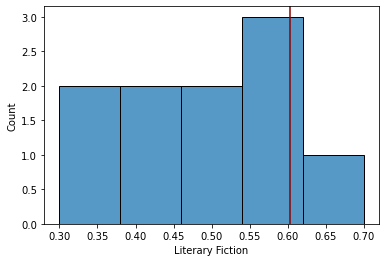

In [171]:
sns.histplot(data=iteration_df,x='Literary Fiction')
plt.axvline(observed['Literary Fiction'].mean(),color='darkred')
